In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df=DATA

In [3]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
df.columns.to_frame()

,0
ID,ID
age,age
job,job
marital,marital
education,education
default,default
balance,balance
housing,housing
loan,loan
contact,contact


In [6]:
df.shape

(31647, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


### the data set contain 18 columns and 31647 rows in wich subscribed column is our label.
### the id columns is unique identification for every rows so we are going to drop that column 
### by obsarving the data we can say that it is a classification problem.
### we did not find any nullvalues.
### and all data types of all columns are correct.

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

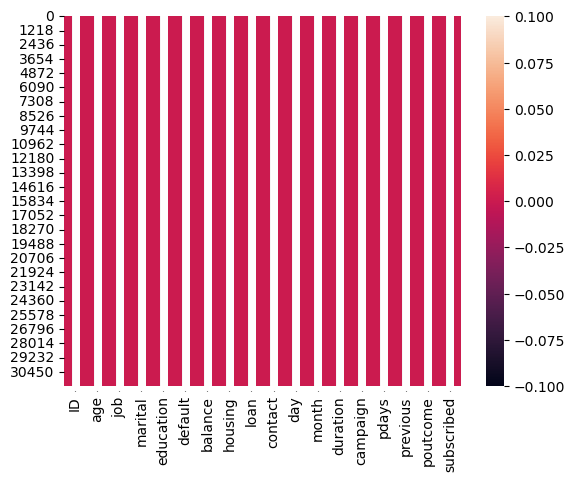

In [15]:
sns.heatmap(df.isnull(),color='red',annot=True)

### no null value found in data set .

In [9]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

<Axes: >

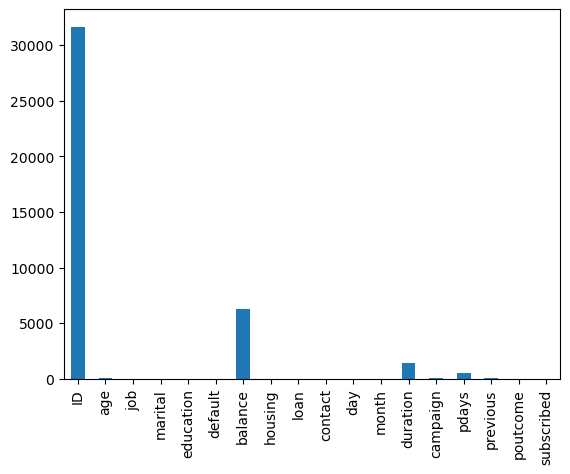

In [10]:
df.nunique().plot(kind='bar')

In [18]:
for i in df.columns:
    print(df[i].value_counts())
    print('/n'*45)

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/

In [19]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### the describe meyhod give as informetion about neumerical colums.
### by obsarving the describe method we can see there are some columns lik id ,age,duration,campaign,previous mean value is greter then median (50%)
### as well as columns like {day}has less mean value then median .
### also we have columns wich have extrimly high mean value then median(50%) like [balance,pdays]
### that mens skewness is present in those columns .
### and we also got to see some columns wich have very high max value as campair to 75% like [age,balance,duration,campaign,pdays,previous] 
### that is also mens that data set has some outliers problem to.

In [20]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

### as seen in skew method 
### in range of [-0.5 to 0.5]are considar as acepteble range of skewnwss 
### columns wich are not in renge are very highly skewed.

### univariate anlysis

<Axes: xlabel='age', ylabel='count'>

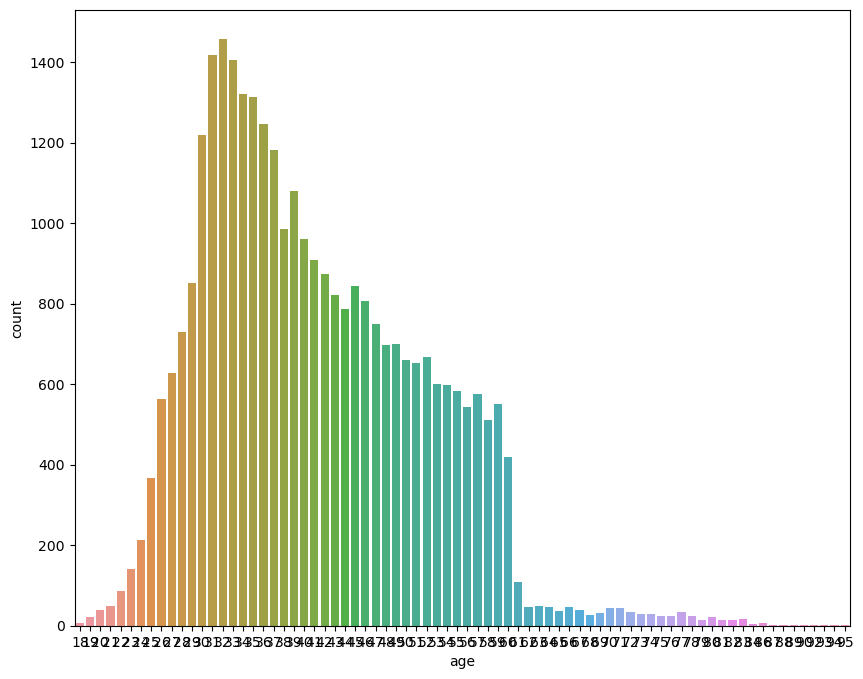

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='age',data=df)

<Axes: xlabel='job', ylabel='count'>

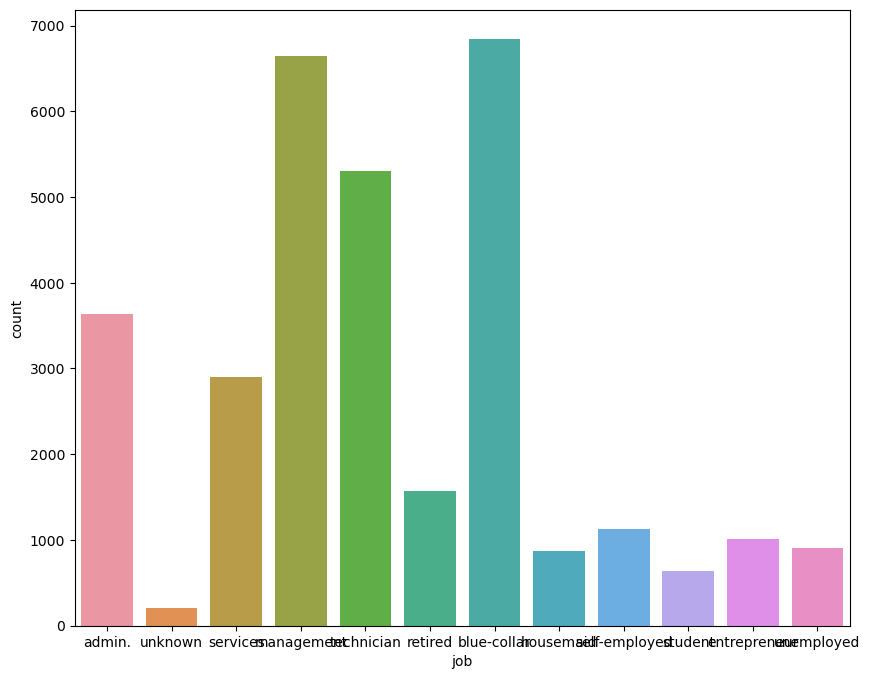

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='job',data=df)

<Axes: xlabel='marital', ylabel='count'>

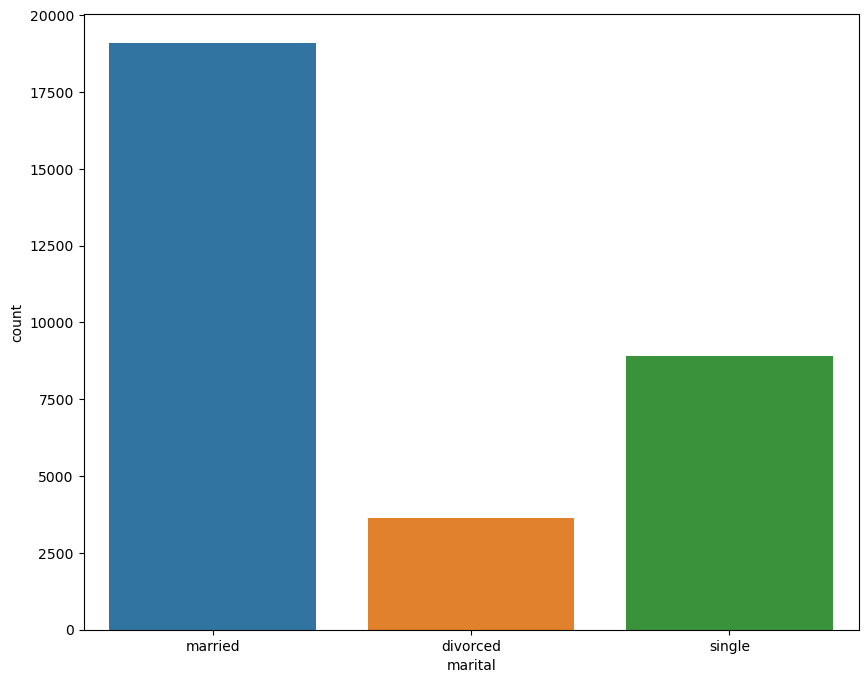

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='marital',data=df)

<Axes: xlabel='education', ylabel='count'>

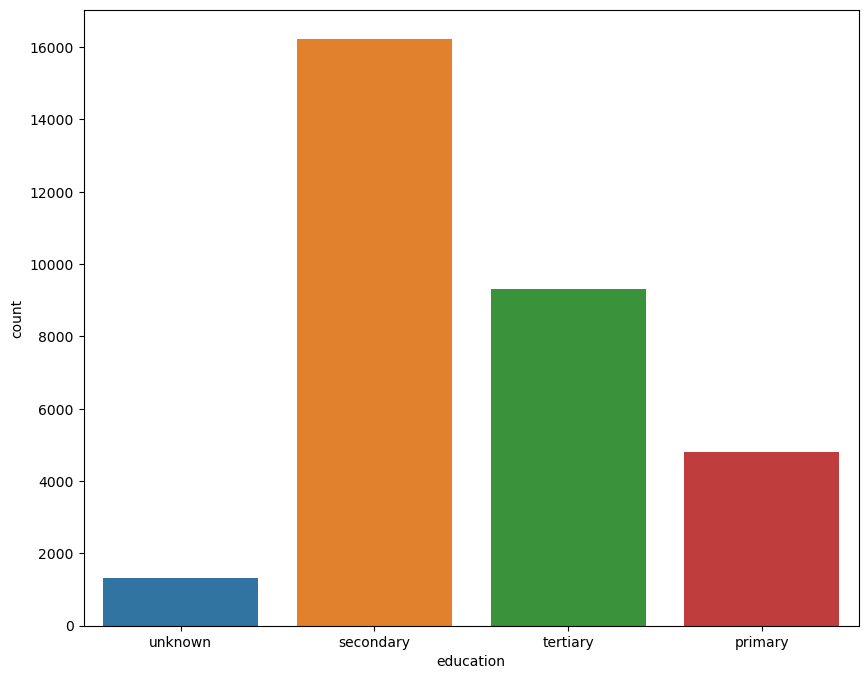

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x='education',data=df)

<Axes: xlabel='default', ylabel='count'>

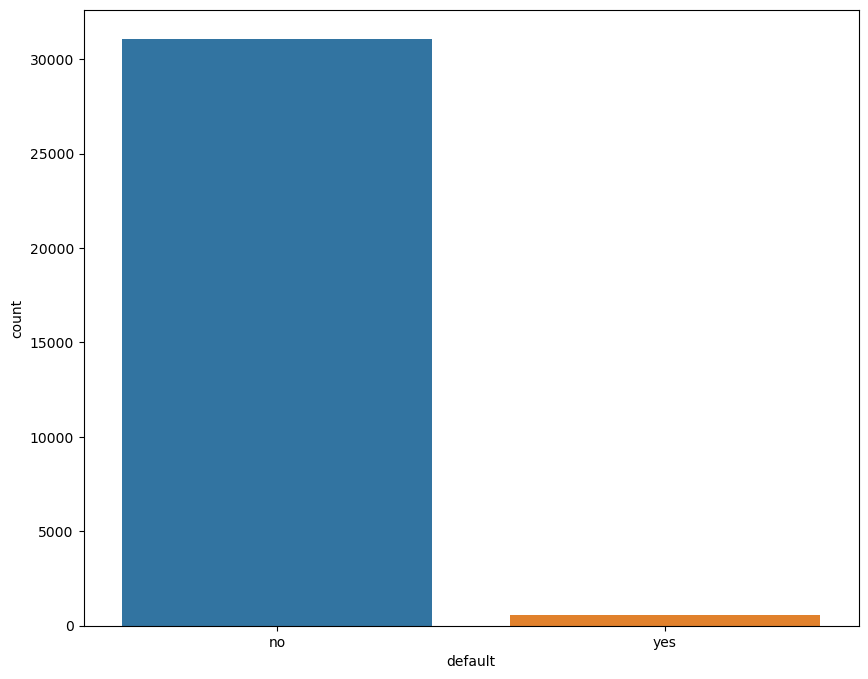

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='default',data=df)

<Axes: xlabel='balance', ylabel='count'>

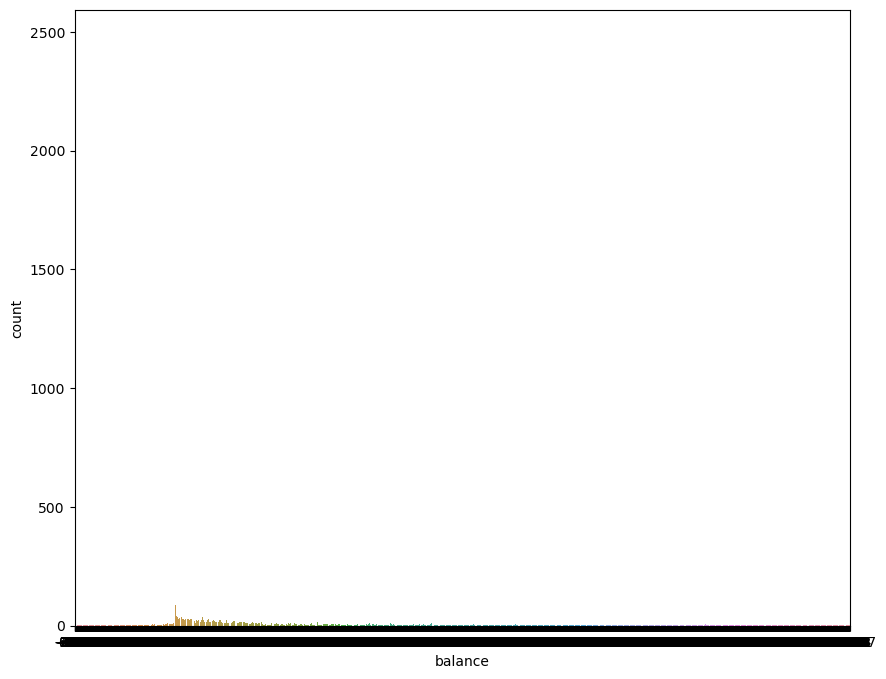

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x='balance',data=df)

<Axes: xlabel='housing', ylabel='count'>

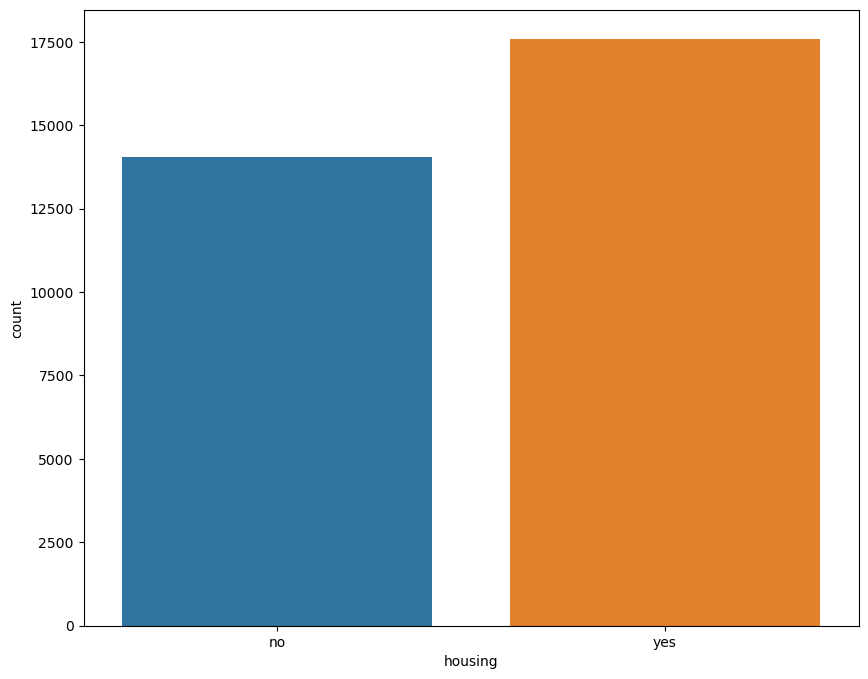

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='housing',data=df)

<Axes: xlabel='loan', ylabel='count'>

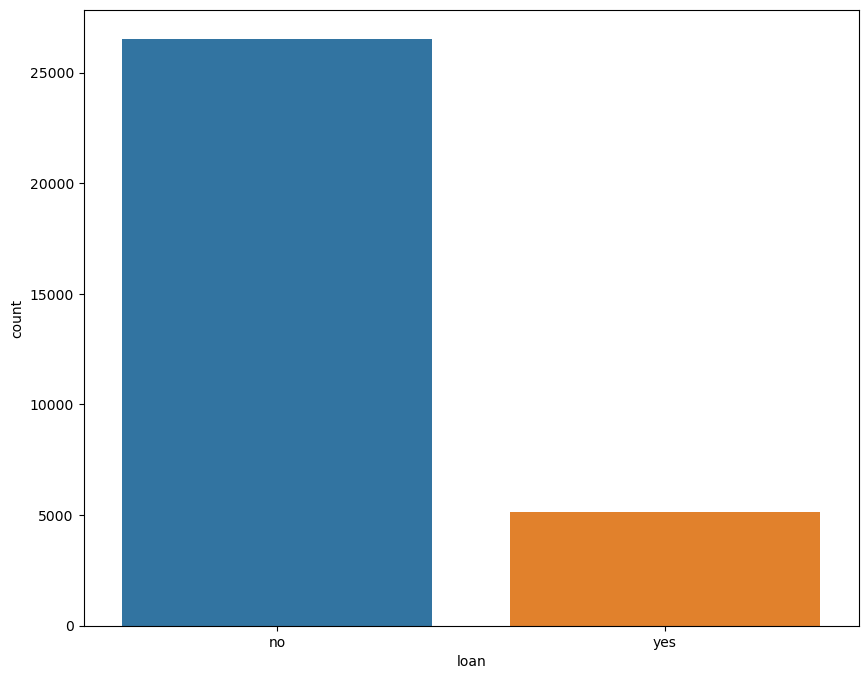

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='loan',data=df)

<Axes: xlabel='contact', ylabel='count'>

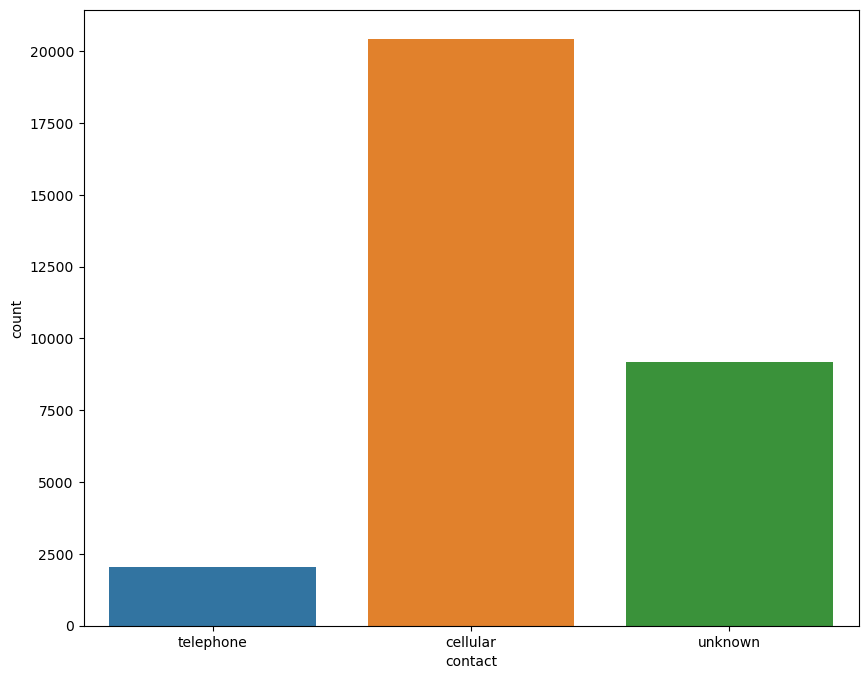

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='contact',data=df)

<Axes: xlabel='month', ylabel='count'>

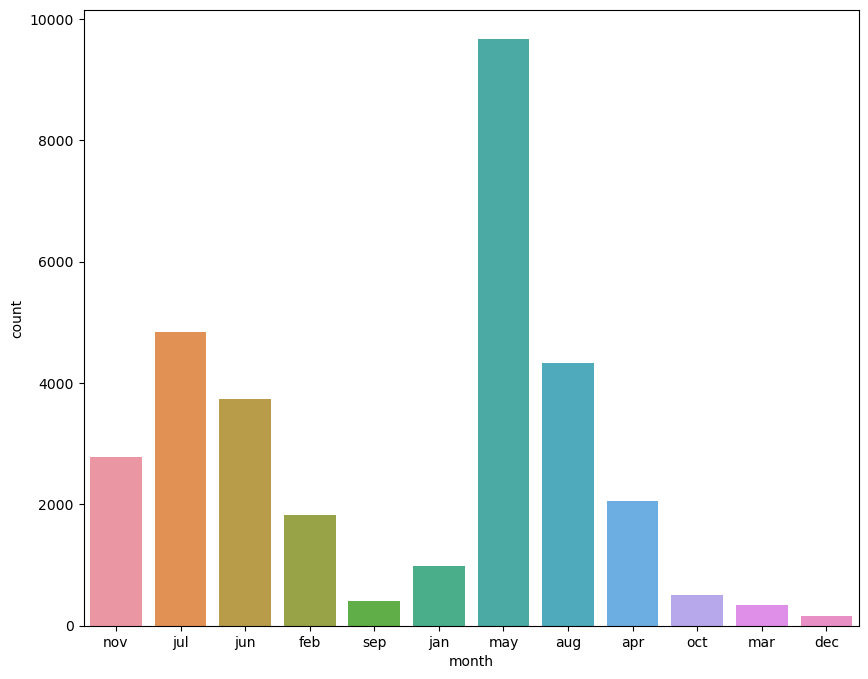

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x='month',data=df)

<Axes: xlabel='day', ylabel='count'>

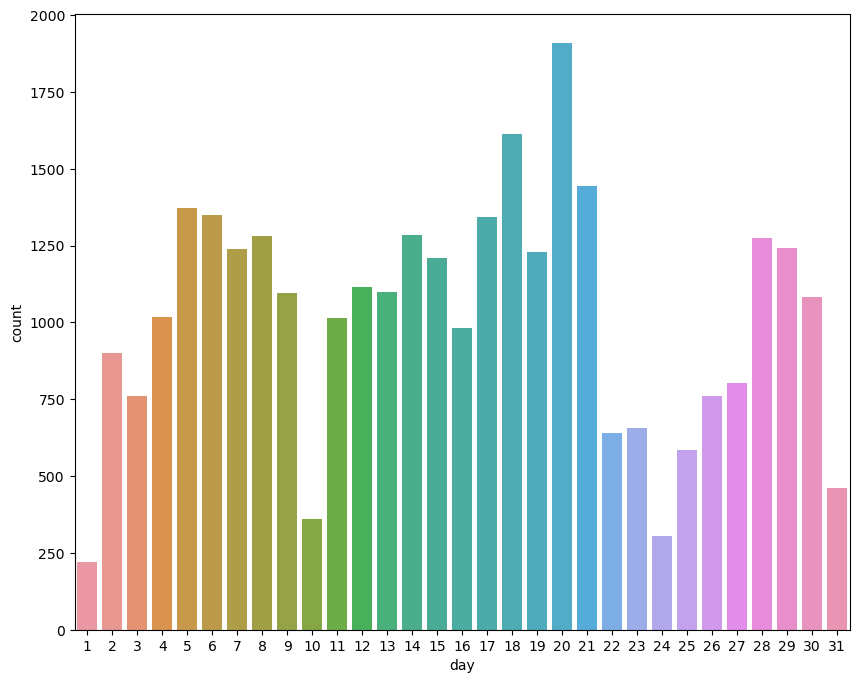

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df)

<Axes: xlabel='duration', ylabel='count'>

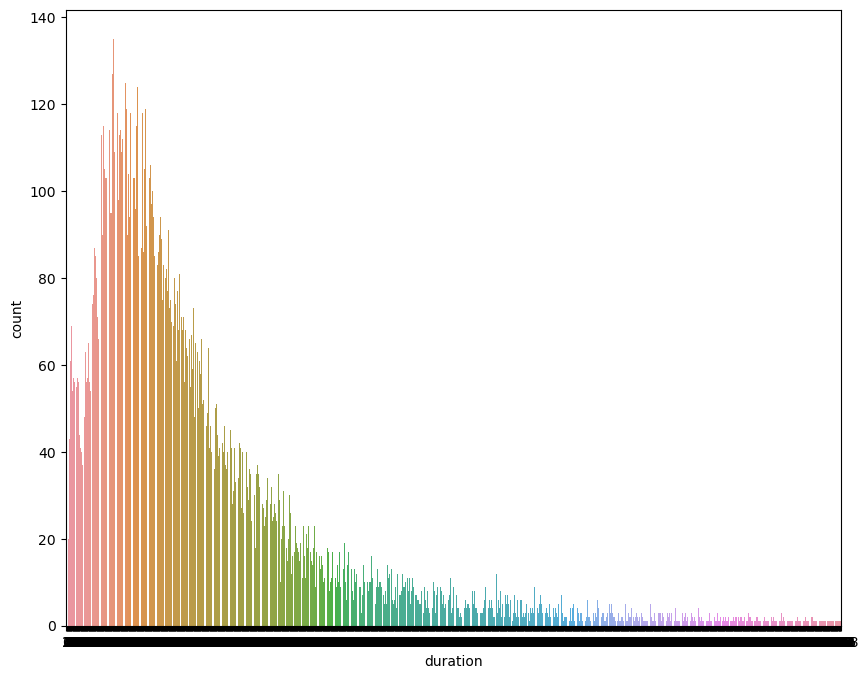

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='duration',data=df)

<Axes: xlabel='campaign', ylabel='count'>

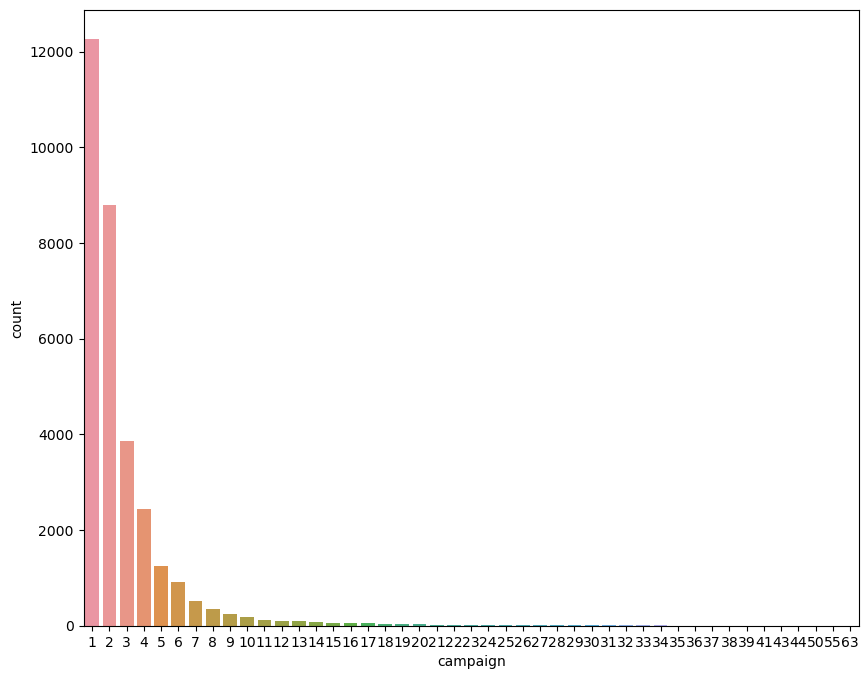

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='campaign',data=df)

<Axes: xlabel='pdays', ylabel='count'>

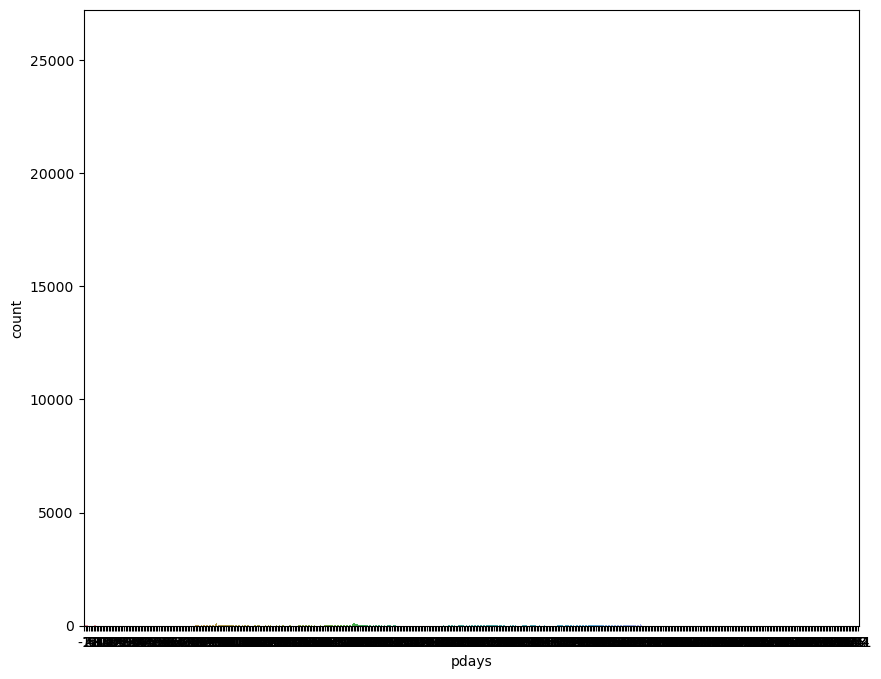

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='pdays',data=df)

<Axes: xlabel='previous', ylabel='count'>

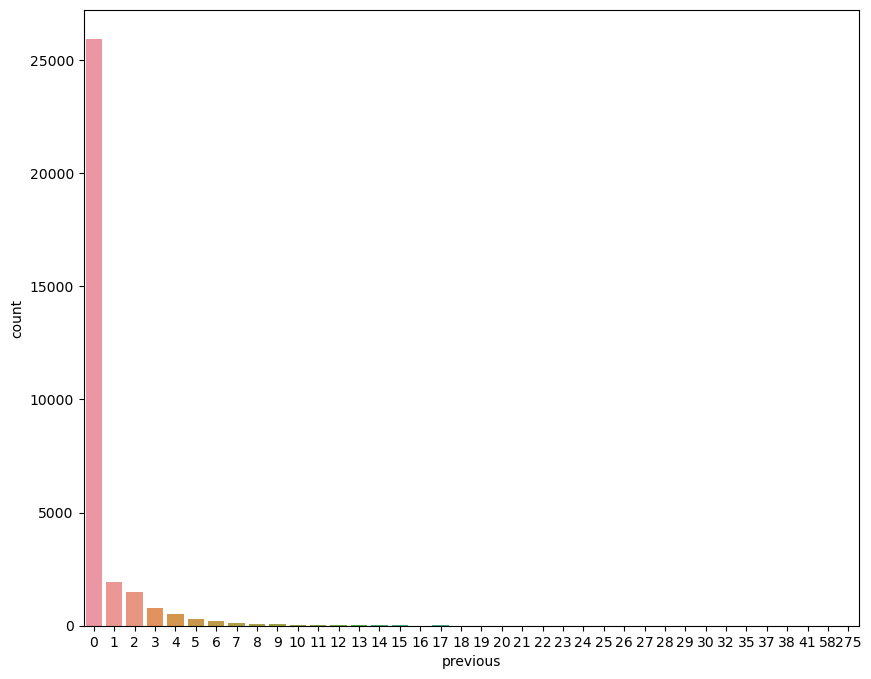

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='previous',data=df)

<Axes: xlabel='poutcome', ylabel='count'>

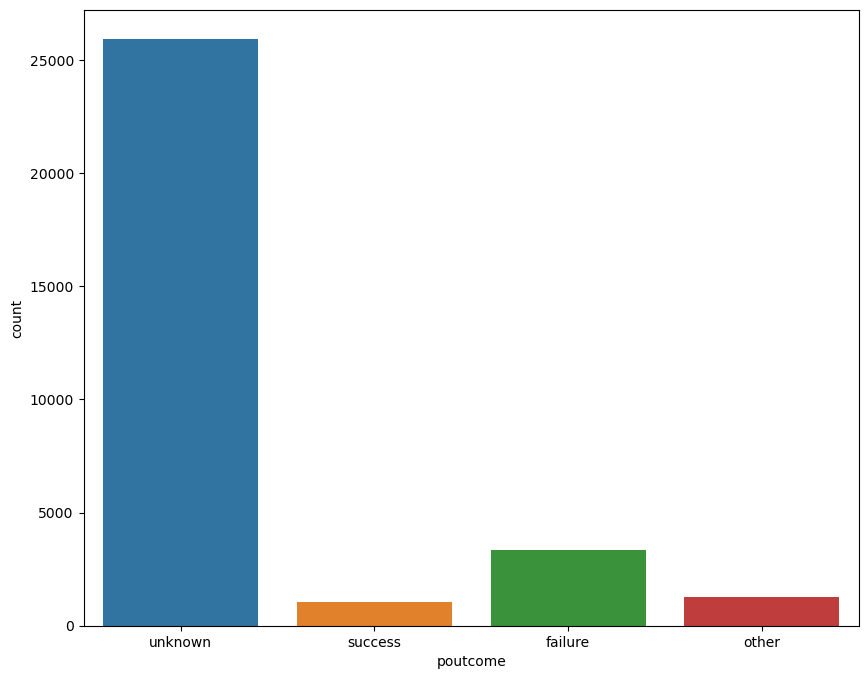

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x='poutcome',data=df)

<Axes: xlabel='subscribed', ylabel='count'>

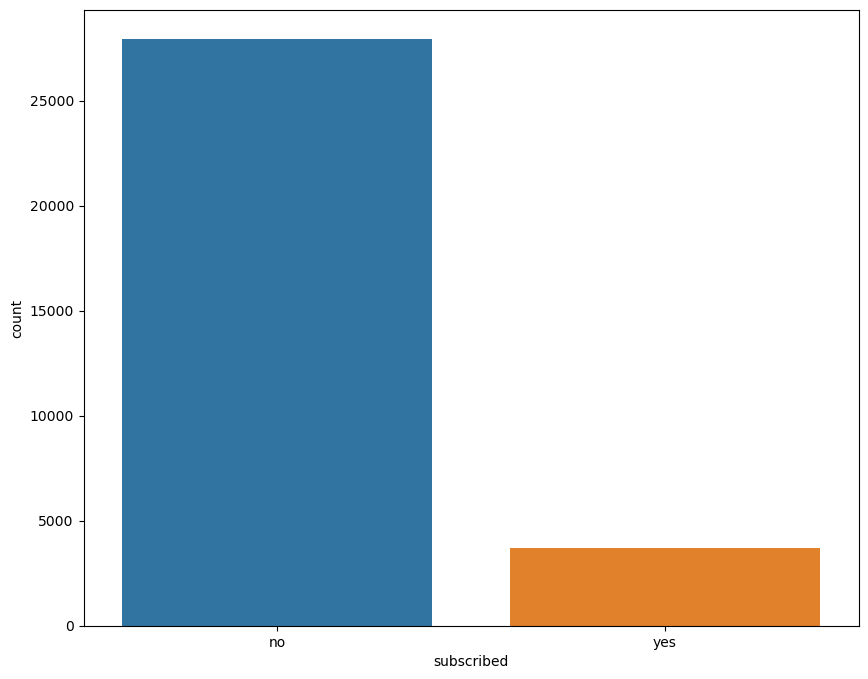

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='subscribed',data=df)

### as seen in countplot class imbalence problem is present.

### bivariate anlysis

Text(0.5, 1.0, 'relation between age and balance')

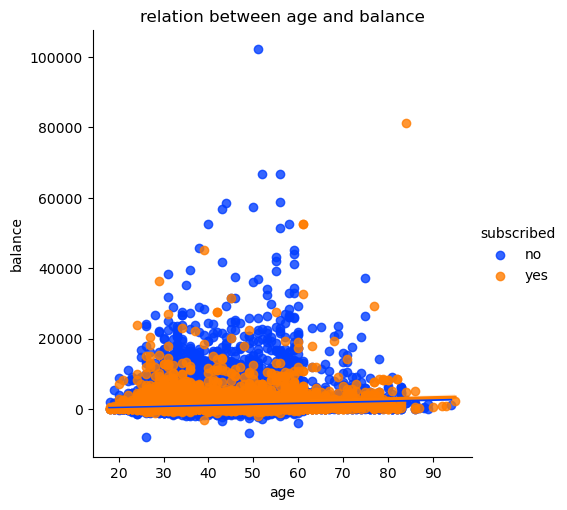

In [42]:
sns.lmplot(x='age',y='balance',data=DATA,hue='subscribed',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and campaign ')

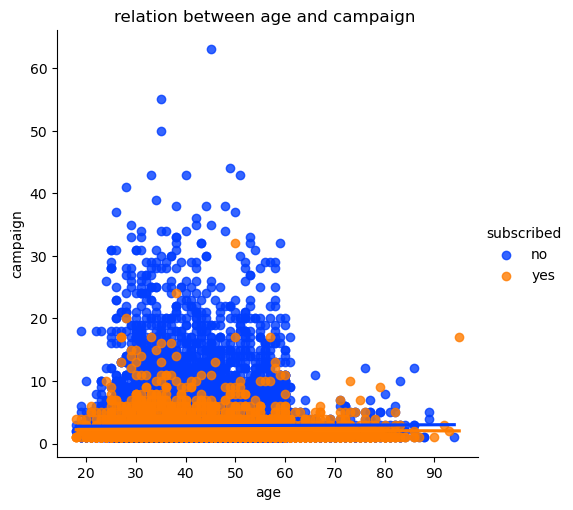

In [44]:
sns.lmplot(x='age',y='campaign',data=DATA,hue='subscribed',palette='bright')
plt.title("relation between age and campaign ")

### we can see in the plot that the coustomer who participate in less then 15 campaign are high chance to subscribe.

Text(0.5, 1.0, 'relation between age and pdays ')

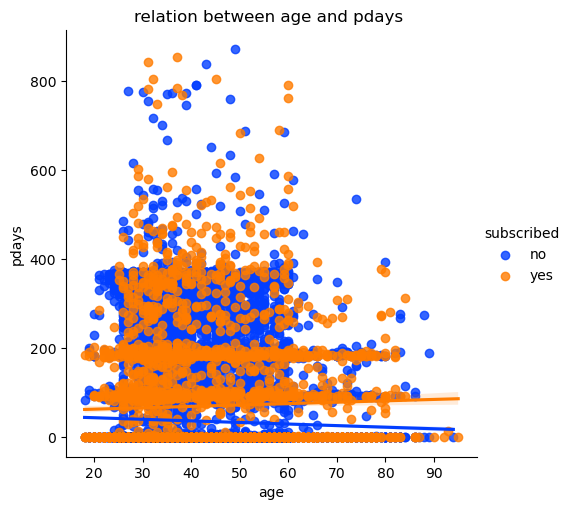

In [46]:
sns.lmplot(x='age',y='pdays',data=DATA,hue='subscribed',palette='bright')
plt.title("relation between age and pdays ")

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [10]:
df['subscribed']=label_encoder.fit_transform(df['subscribed'])

Text(0.5, 1.0, 'relation between age and balance')

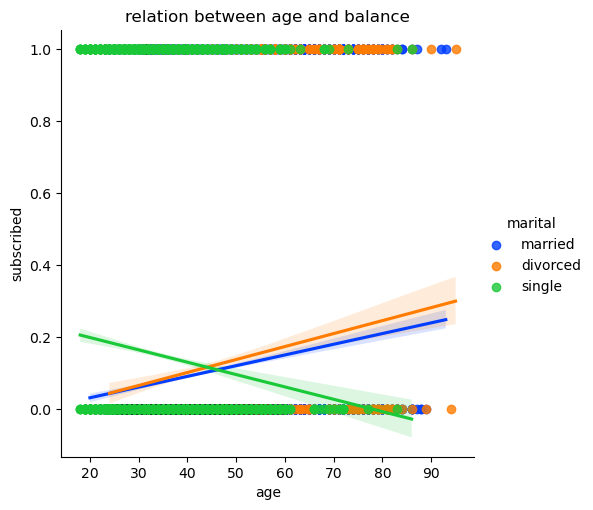

In [61]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='marital',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and campaign ')

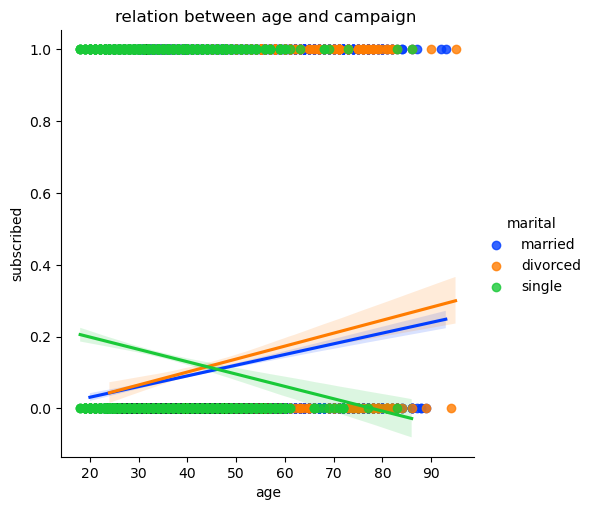

In [62]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='marital',palette='bright')
plt.title("relation between age and campaign ")

Text(0.5, 1.0, 'relation between pdays and subscribed ')

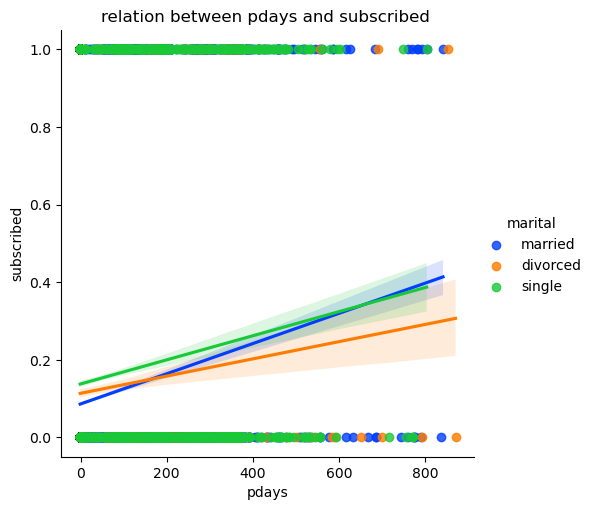

In [73]:
sns.lmplot(x='pdays',y='subscribed',data=DATA,hue='marital',palette='bright')
plt.title("relation between pdays and subscribed ")

Text(0.5, 1.0, 'relation between age and balance')

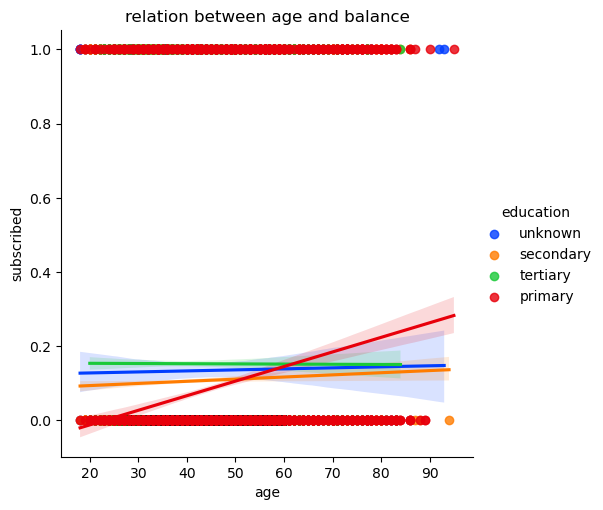

In [64]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='education',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and campaign ')

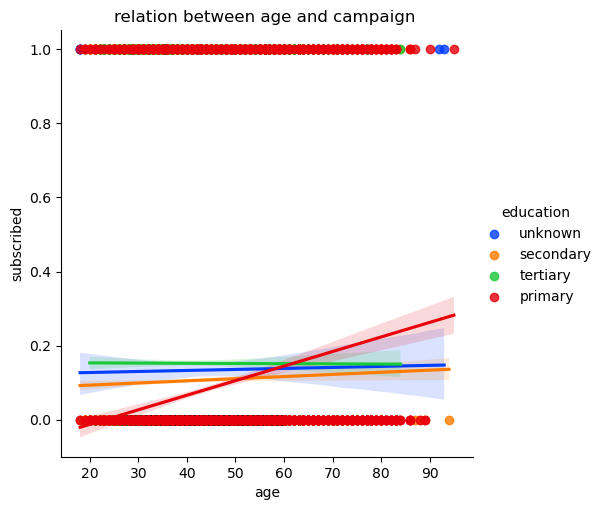

In [65]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='education',palette='bright')
plt.title("relation between age and campaign ")

Text(0.5, 1.0, 'relation between age and pdays ')

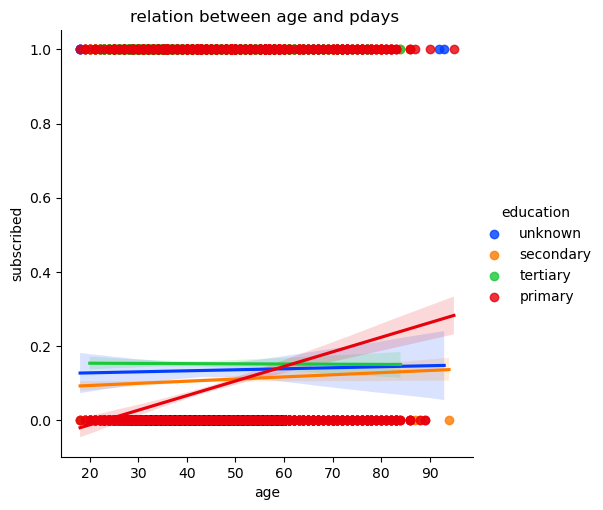

In [66]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='education',palette='bright')
plt.title("relation between age and pdays ")

Text(0.5, 1.0, 'relation between age and balance')

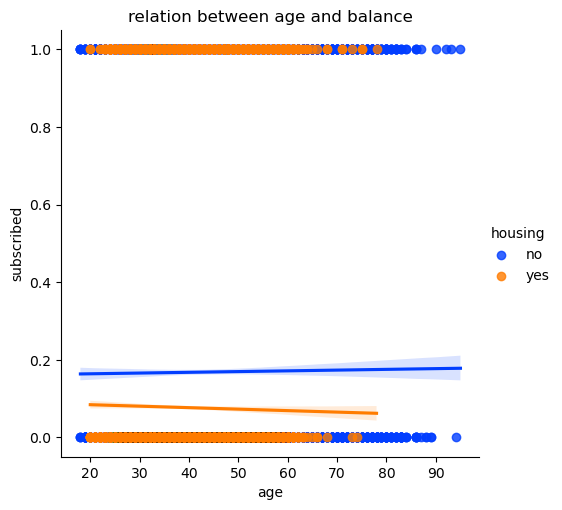

In [67]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='housing',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and balance')

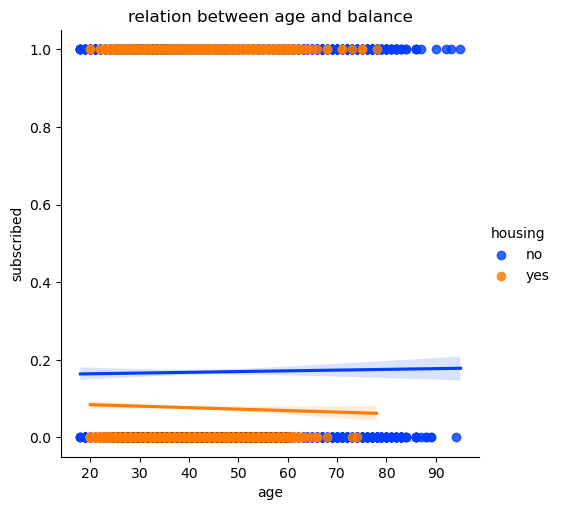

In [68]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='housing',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and balance')

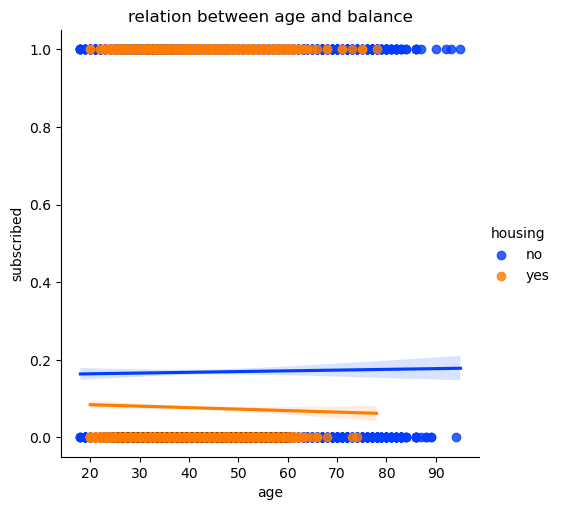

In [69]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='housing',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and balance')

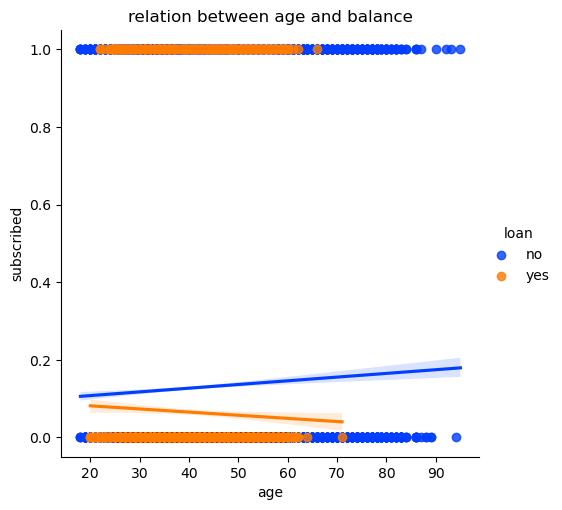

In [70]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='loan',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and balance')

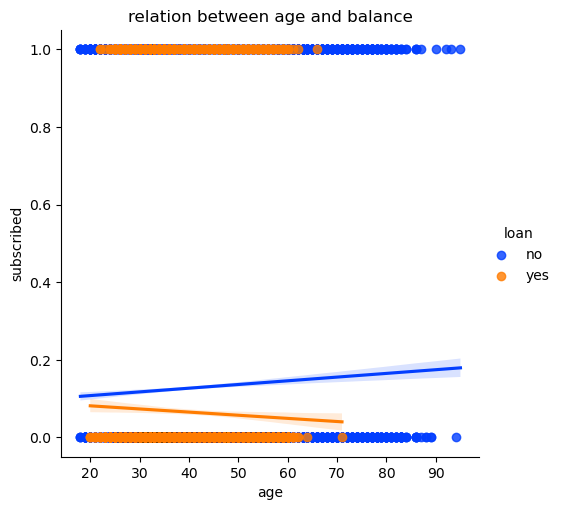

In [71]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='loan',palette='bright')
plt.title("relation between age and balance")

Text(0.5, 1.0, 'relation between age and balance')

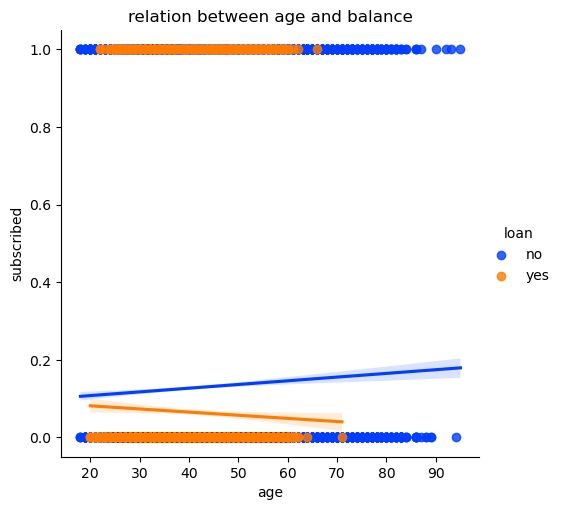

In [72]:
sns.lmplot(x='age',y='subscribed',data=DATA,hue='loan',palette='bright')
plt.title("relation between age and balance")

### multivariate anlysis

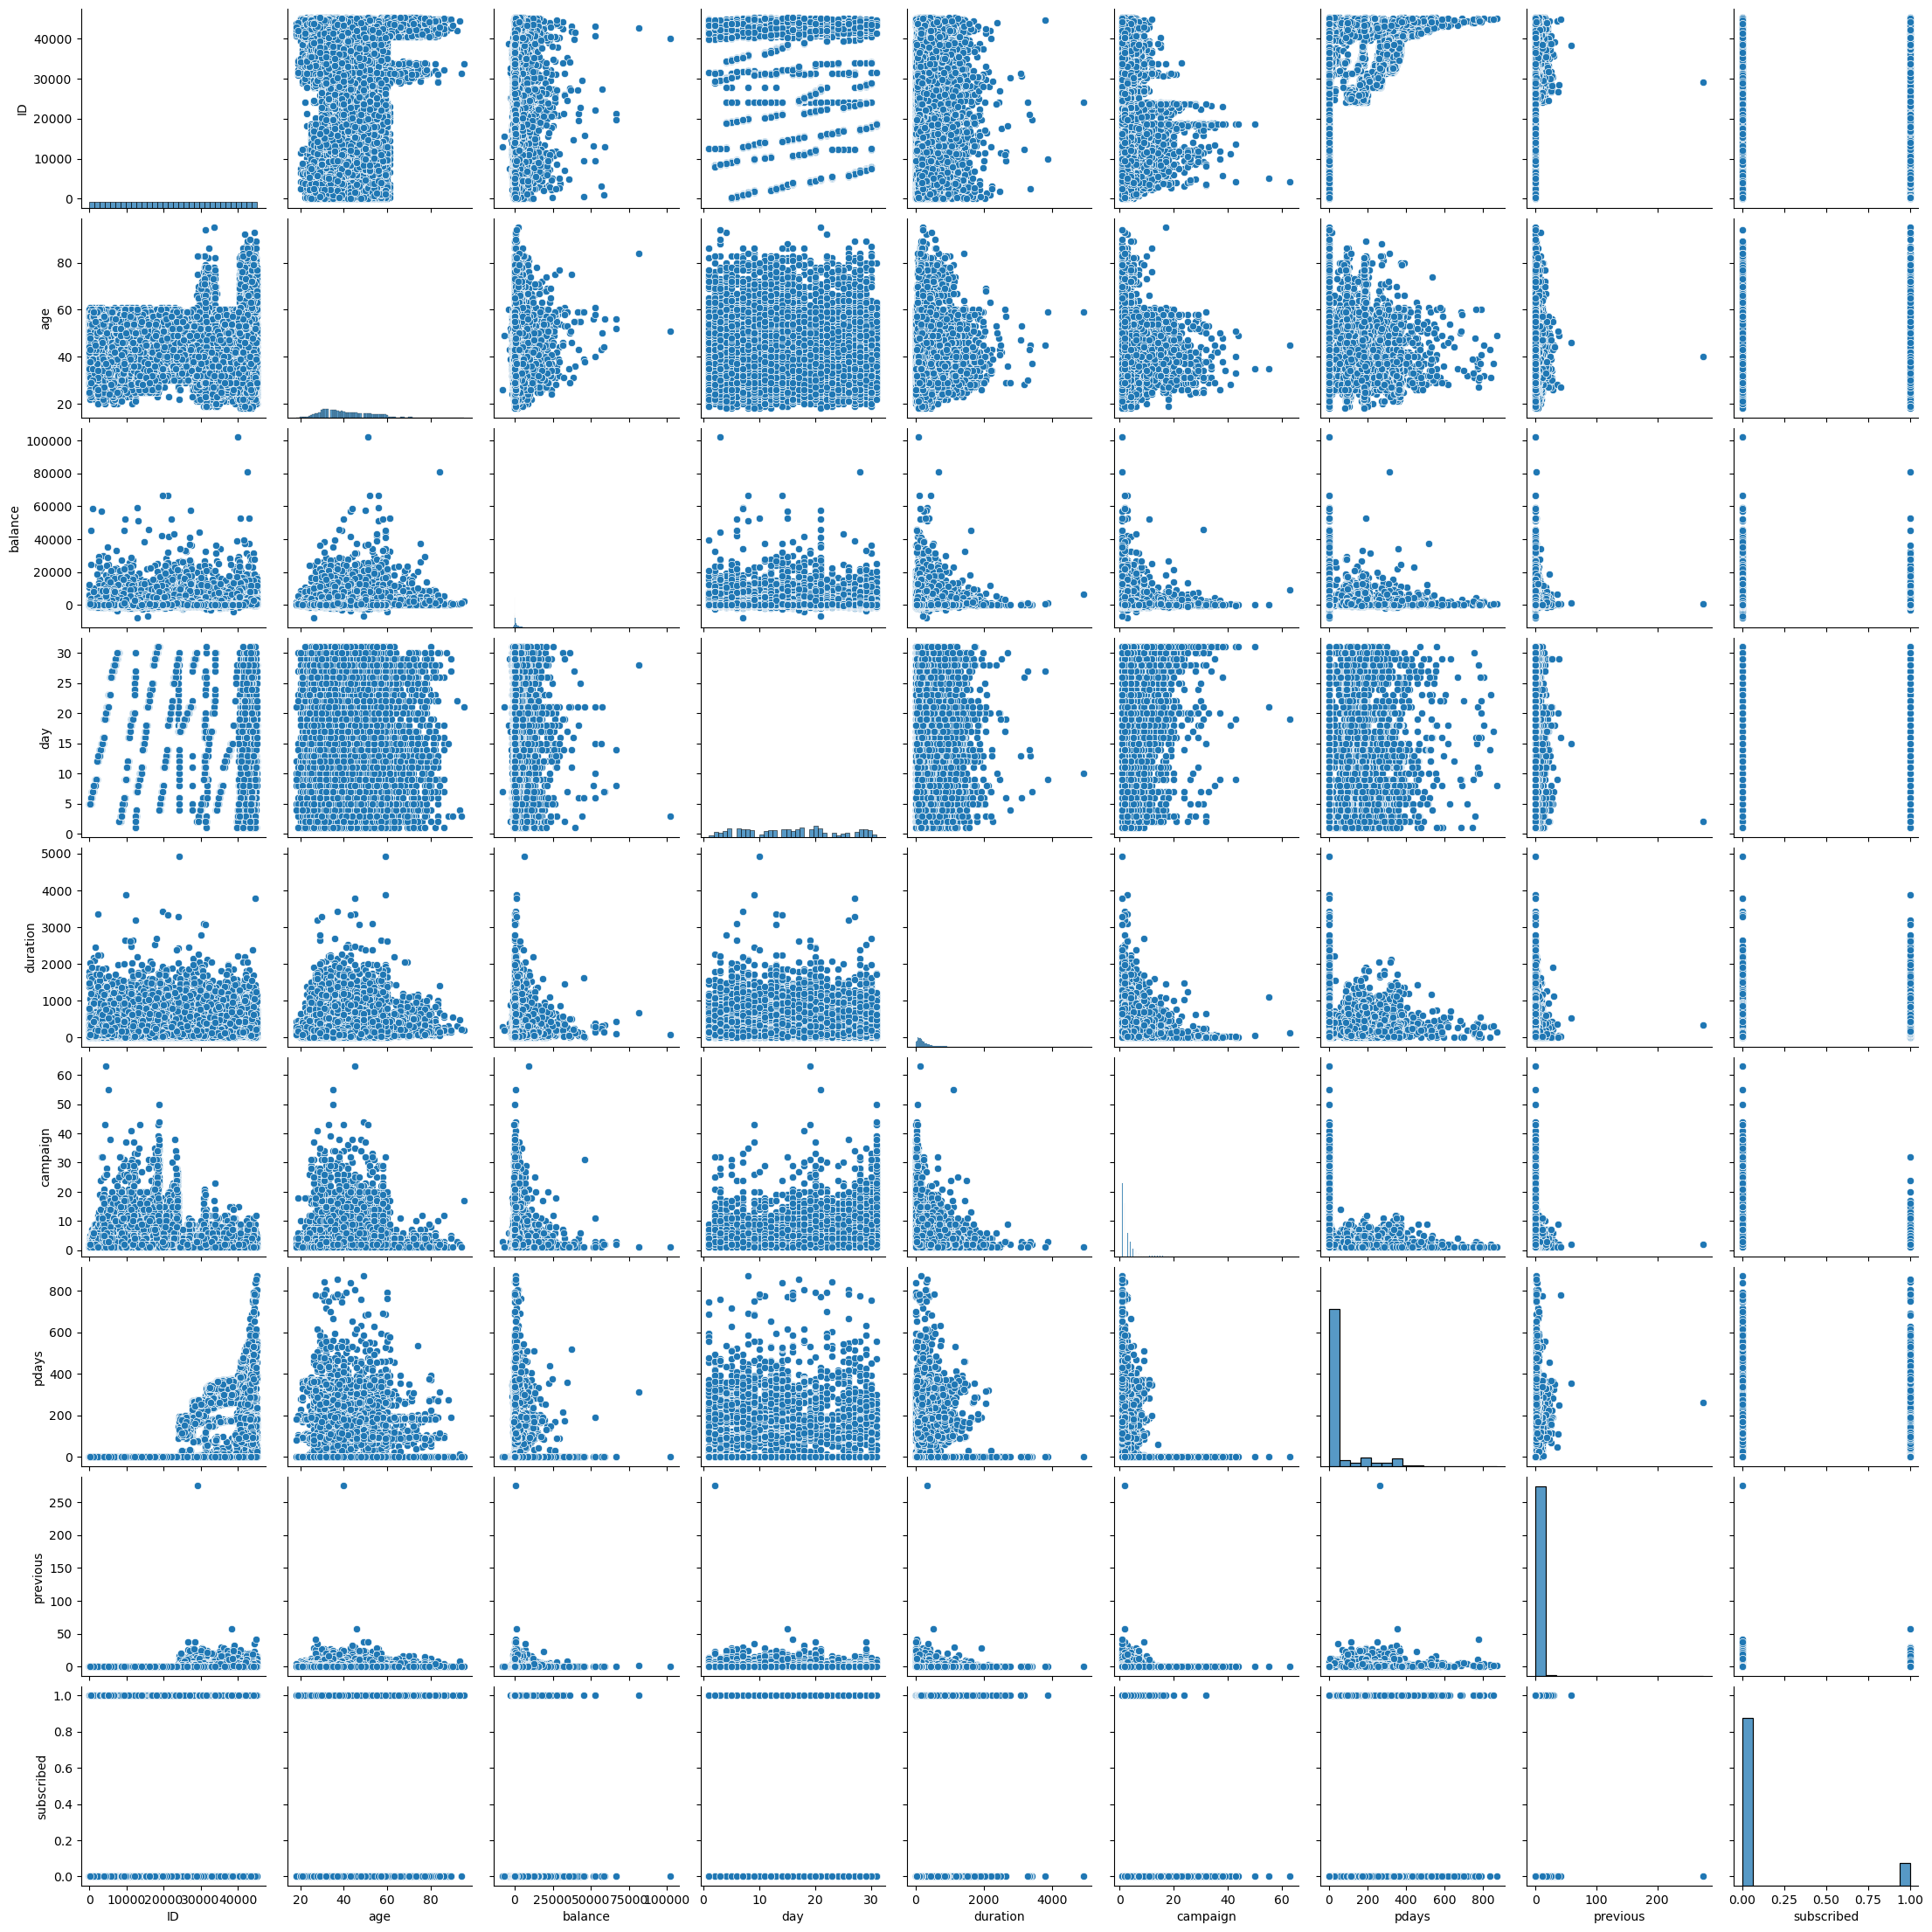

In [74]:
sns.pairplot(df)

### lets chek the outliersin box plot

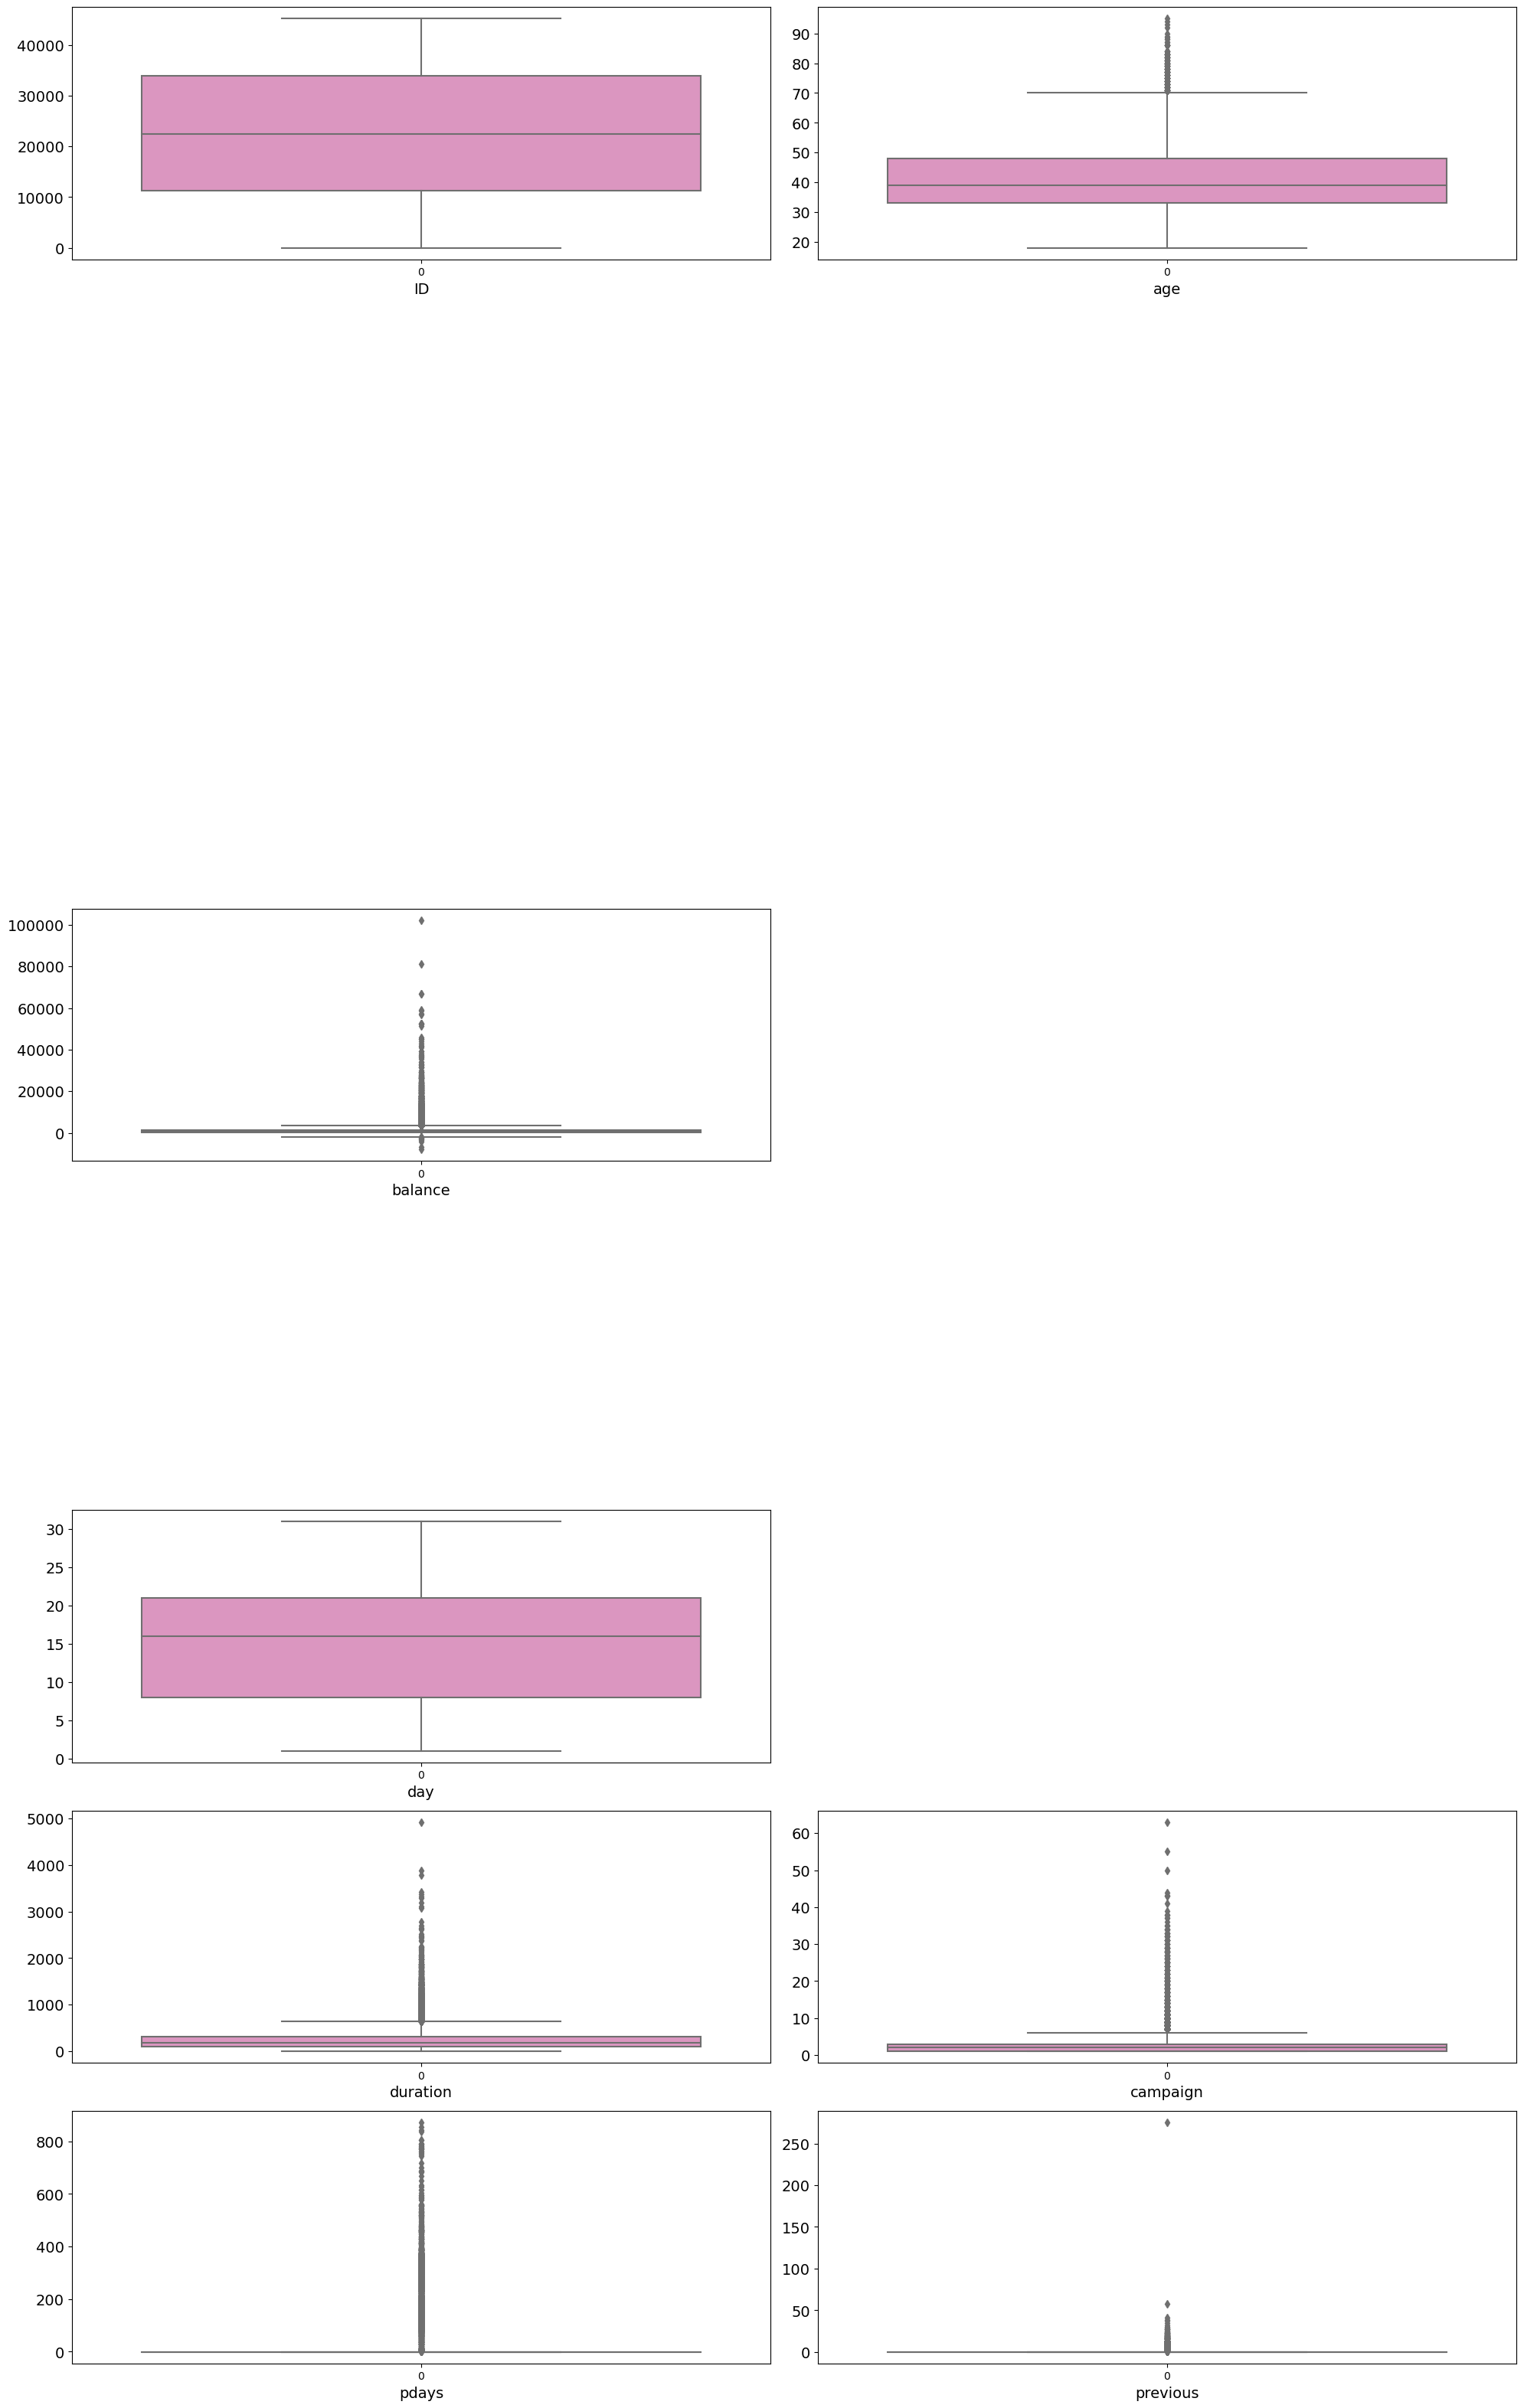

In [78]:
plt.figure(figsize=(20,35))
value=1
for col in df:
    if value <=17:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            g=plt.subplot(9,2,value)
            sns.boxplot(df[col],palette="Set2_r")
            plt.xlabel(col,fontsize=14)
            plt.yticks(rotation=0,fontsize=14)
    value+=1
plt.tight_layout()

### lets se outlies in detail

In [11]:
from scipy import stats
from scipy.stats import zscore

In [12]:
out_columns=df[['age','balance','day','duration','campaign','pdays','previous']]
z_scor=np.abs(zscore(out_columns))

In [13]:
np.where(z_scor>2.5)

(array([   18,    21,    26, ..., 31645, 31645, 31646], dtype=int64),
 array([3, 4, 1, ..., 5, 6, 3], dtype=int64))

In [14]:
df.iloc[31645]

ID                 38556
age                   57
job           technician
marital          married
education      secondary
default               no
balance              225
housing              yes
loan                  no
contact        telephone
day                   15
month                may
duration              22
campaign               7
pdays                337
previous              12
poutcome         failure
subscribed             0
Name: 31645, dtype: object

In [15]:
df1=df[(z_scor<2.5).all(axis=1)]

### removed putliers.

### lets chek the distribution of data in every column

ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

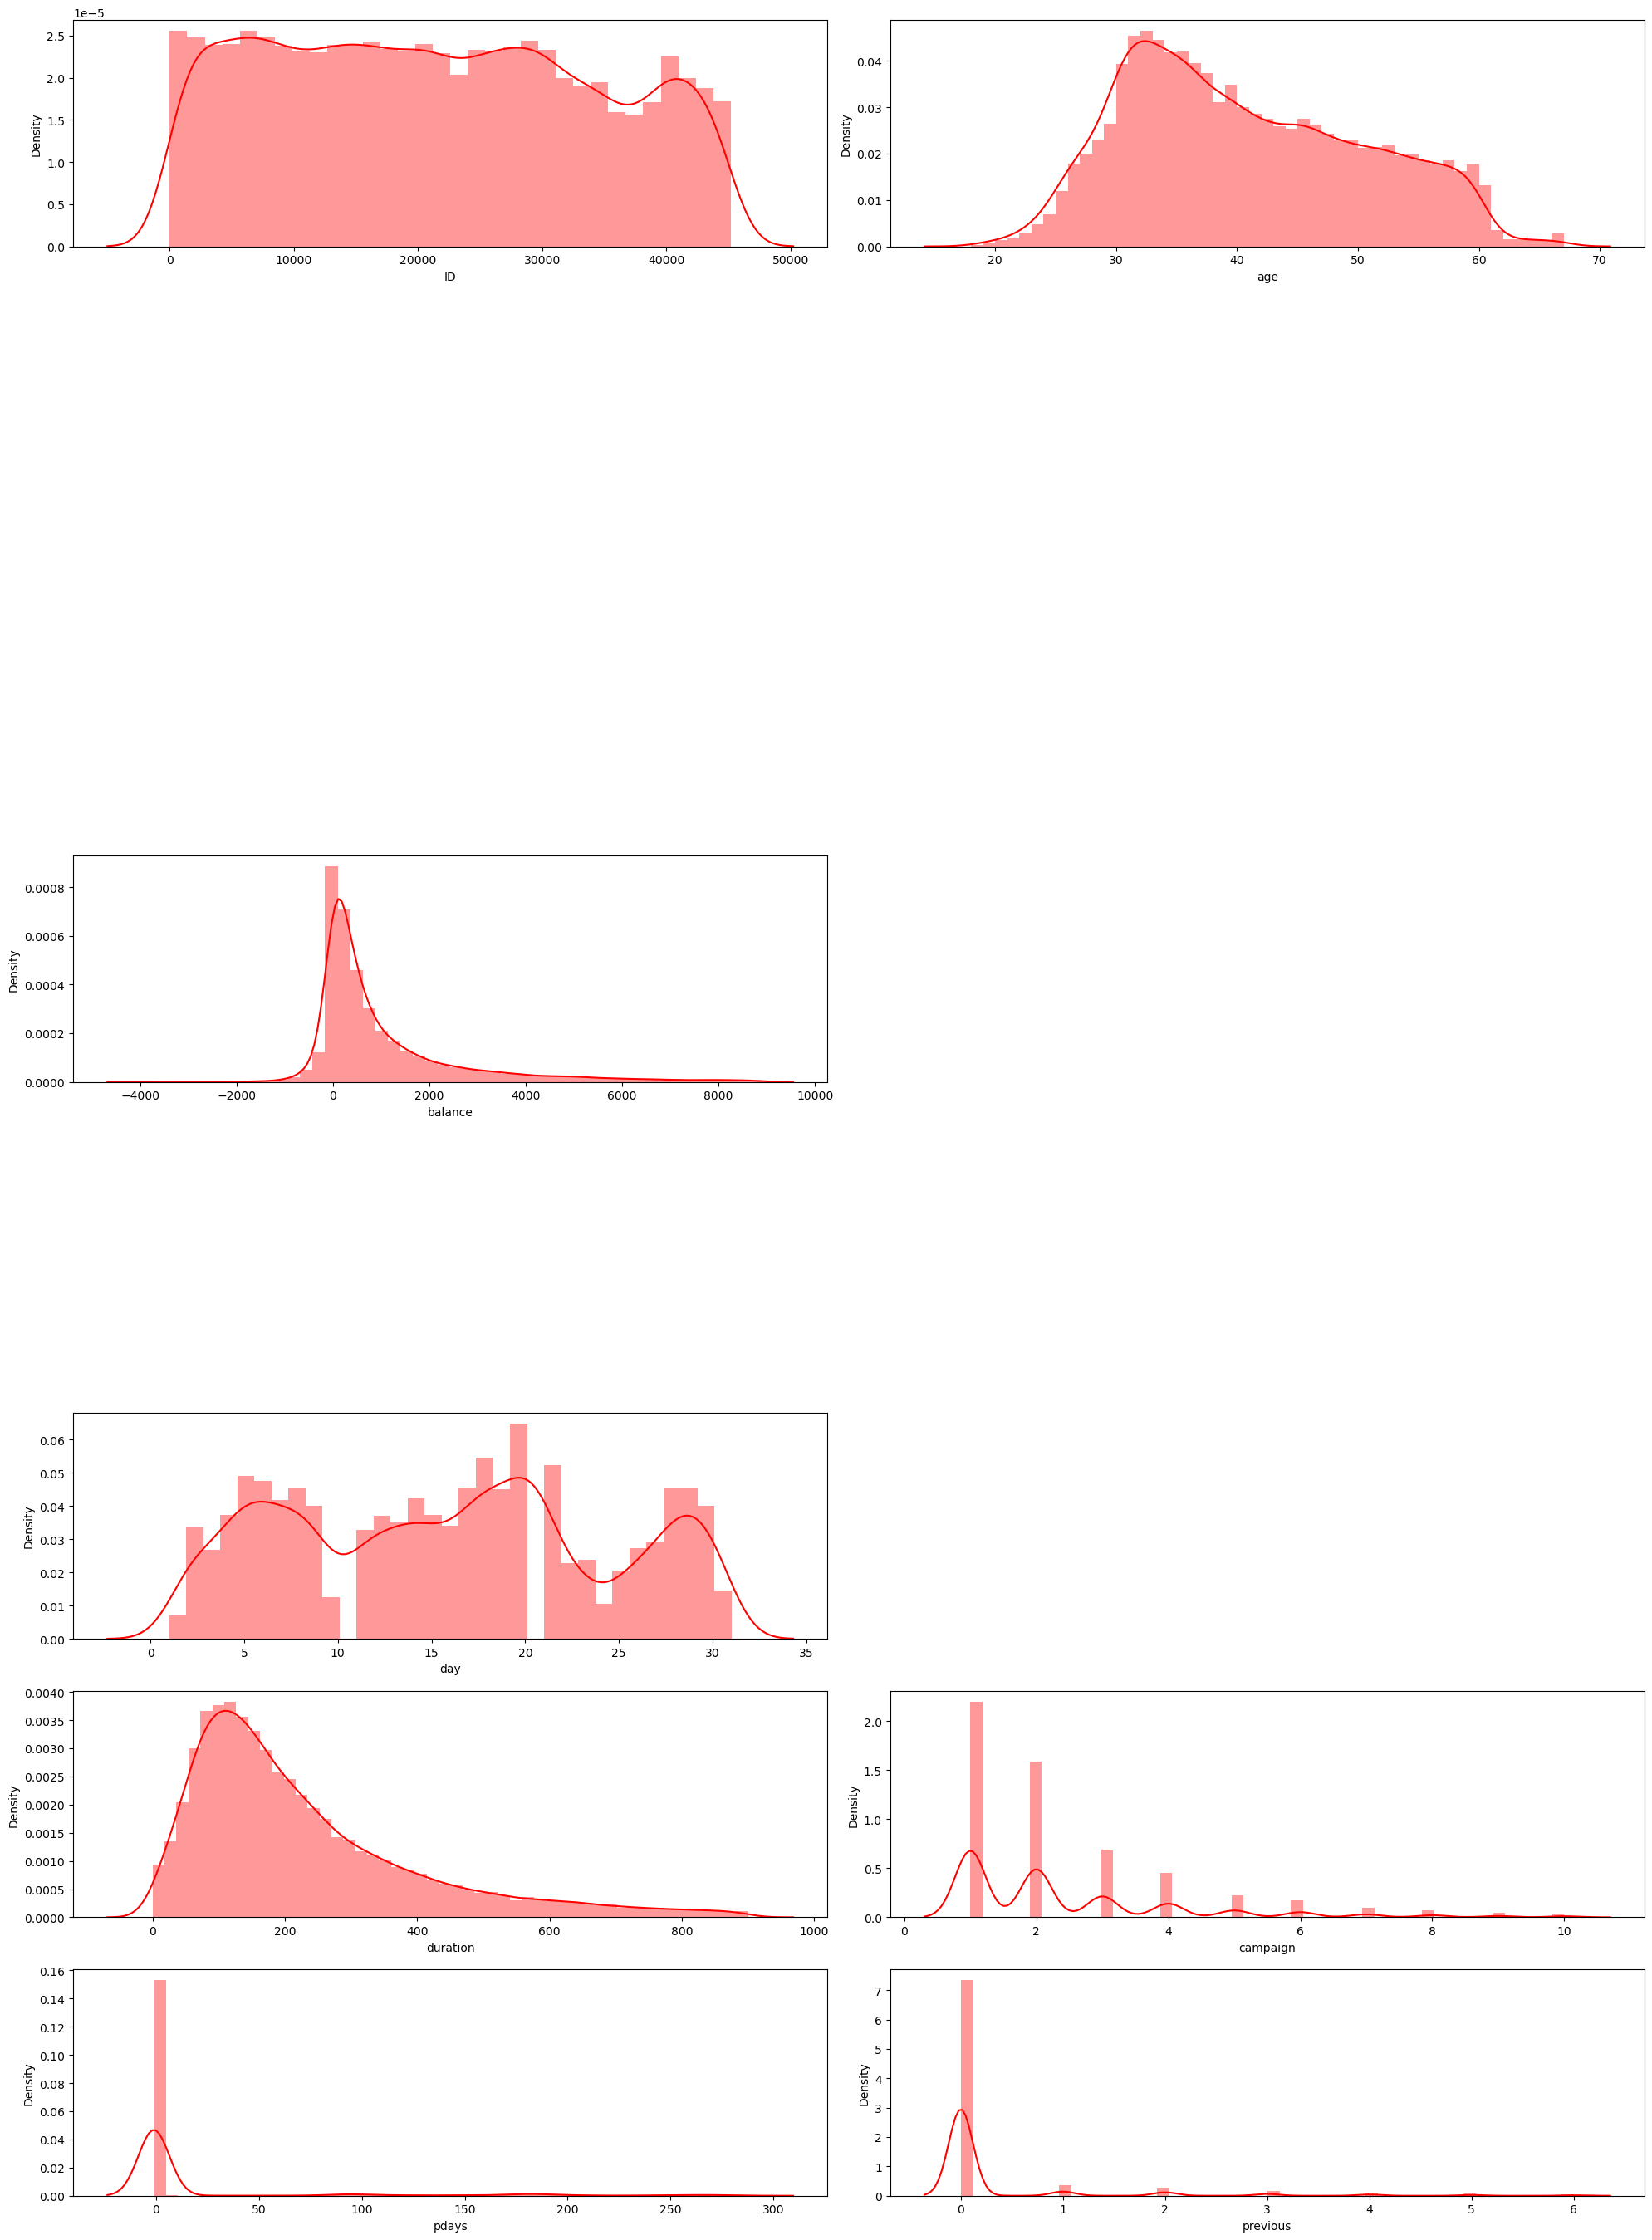

In [92]:
plt.figure(figsize=(20,30))
plot_v=1
for col in df1:
    if plot_v <=18:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            p=plt.subplot(9,2,plot_v)
            sns.distplot(df1[col],color='red')
            plt.xlabel(col,fontsize=10)
            plt.yticks(rotation=0,fontsize=10)
    plot_v+=1
plt.tight_layout() 
df.skew()

### lets remove the skewnwss

In [16]:
df1['age']=np.cbrt(df1['age'])
df1['balance']=np.cbrt(df1['balance'])
df1['duration']=np.cbrt(df1['duration'])
df1['campaign']=np.cbrt(df1['campaign'])
df1['pdays']=np.cbrt(df1['pdays']) # removing skewness with cube root(cbrt) methode
df1['previous']=np.cbrt(df1['previous'])

In [17]:
df1.skew()

ID            0.119376
age           0.092800
balance      -0.479302
day           0.069907
duration      0.230283
campaign      0.898696
pdays         2.442929
previous      2.547086
subscribed    2.768609
dtype: float64

## now lwts see the subplot

ID            0.119376
age           0.092800
balance      -0.479302
day           0.069907
duration      0.230283
campaign      0.898696
pdays         2.442929
previous      2.547086
subscribed    2.768609
dtype: float64

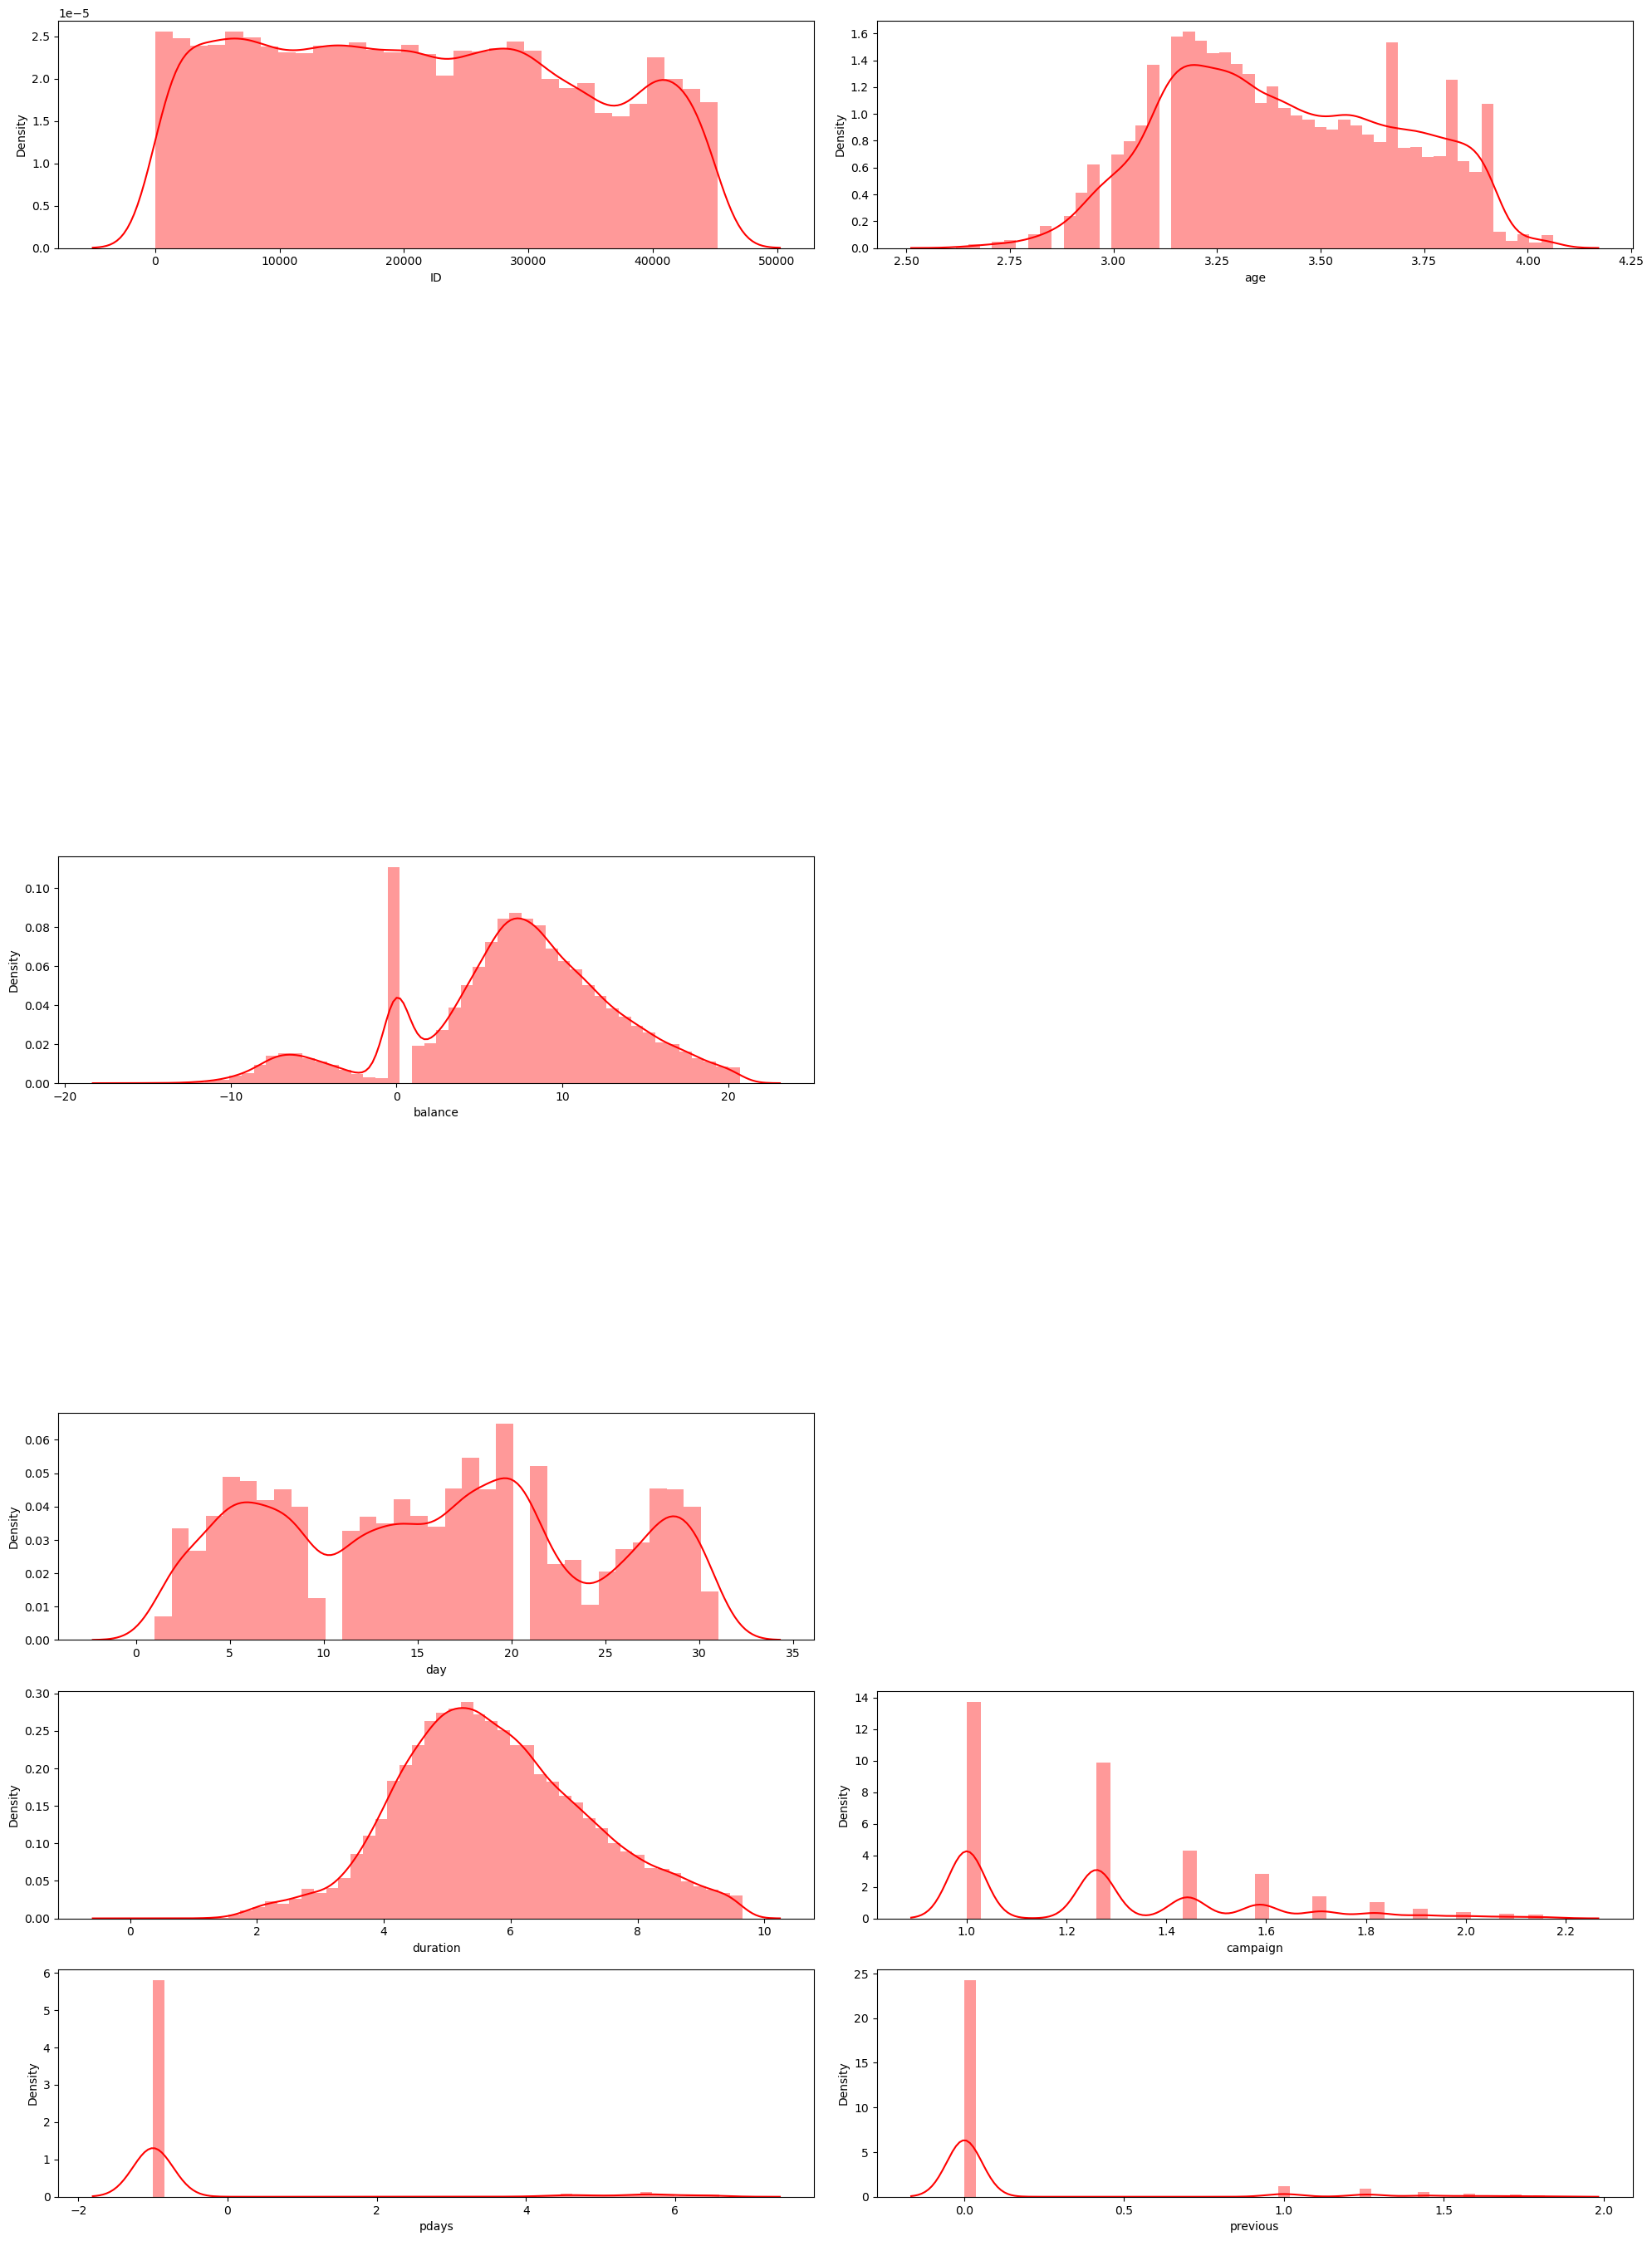

In [17]:
plt.figure(figsize=(20,30))
plot_v=1
for col in df1:
    if plot_v <=18:
        if df1.dtypes[col] == 'int64'or df1.dtypes[col] == 'float64':
            p=plt.subplot(9,2,plot_v)
            sns.distplot(df1[col],color='red')
            plt.xlabel(col,fontsize=10)
            plt.yticks(rotation=0,fontsize=10)
    plot_v+=1
plt.tight_layout() 
df1.skew()

## let chek if data has any multicolinearty issue.

In [99]:
df1.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,-0.067530,0.139471,-0.041386,0.004536,-0.084460,0.398875,0.404132,0.320784
age,-0.067530,1.000000,0.067242,-0.007465,-0.045955,0.053710,-0.004964,-0.003544,-0.036119
balance,0.139471,0.067242,1.000000,-0.014165,0.020230,-0.021211,0.095832,0.096307,0.092719
day,-0.041386,-0.007465,-0.014165,1.000000,-0.037207,0.127266,-0.037796,-0.039789,-0.028644
duration,0.004536,-0.045955,0.020230,-0.037207,1.000000,-0.103958,0.024828,0.027116,0.304264
campaign,-0.084460,0.053710,-0.021211,0.127266,-0.103958,1.000000,-0.102332,-0.095936,-0.083241
pdays,0.398875,-0.004964,0.095832,-0.037796,0.024828,-0.102332,1.000000,0.964028,0.190625
previous,0.404132,-0.003544,0.096307,-0.039789,0.027116,-0.095936,0.964028,1.000000,0.206877
subscribed,0.320784,-0.036119,0.092719,-0.028644,0.304264,-0.083241,0.190625,0.206877,1.000000


<Axes: >

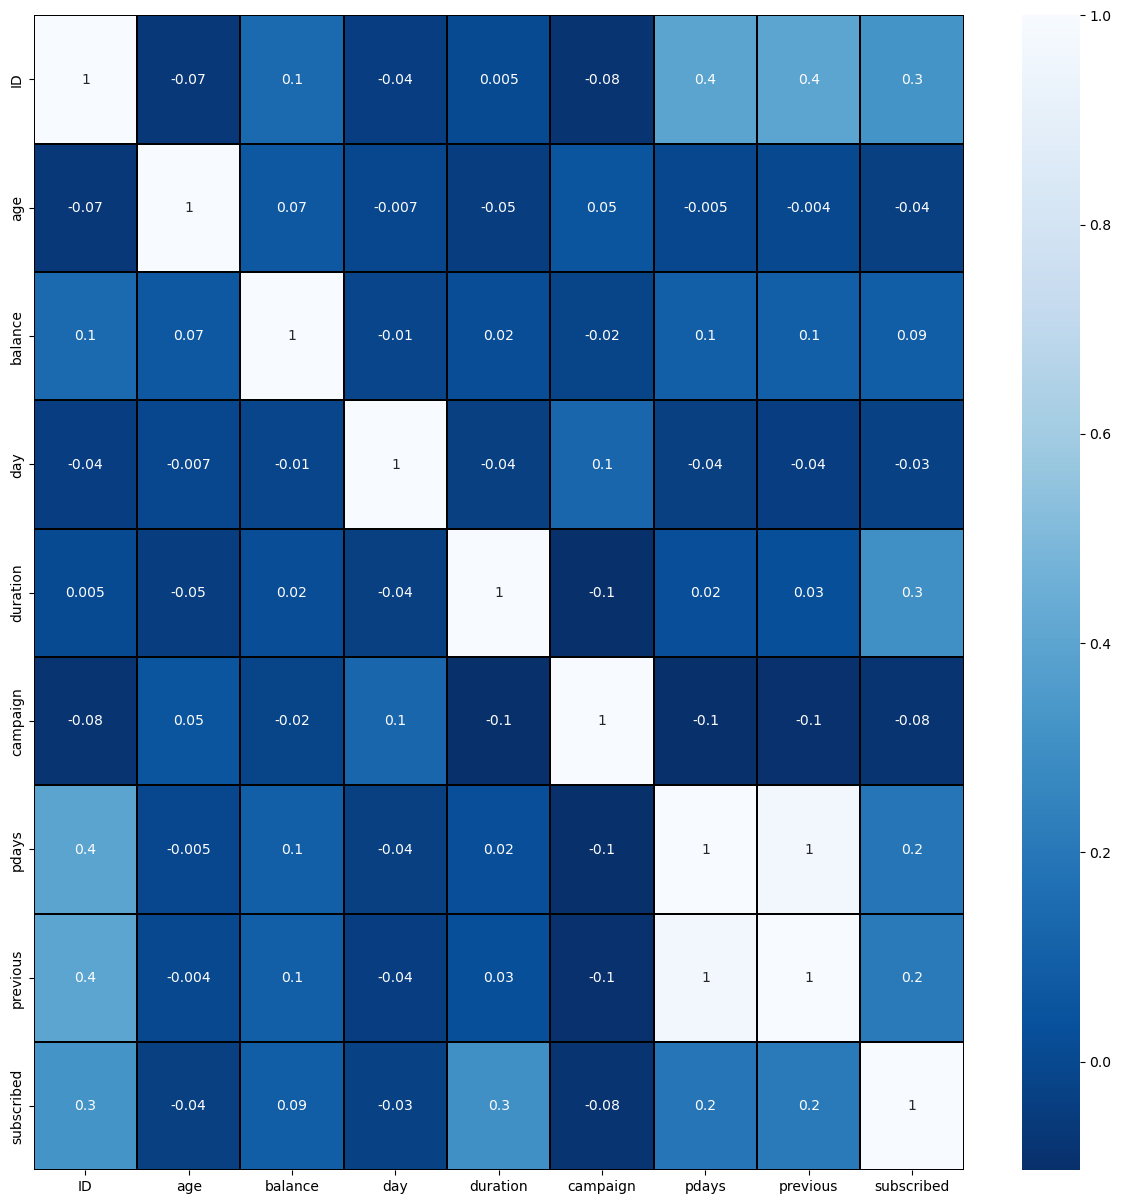

In [101]:
cor=df1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,linewidths=0.1,fmt='.1g',linecolor='black',annot= True,cmap='Blues_r')

### as seen in the above heat map the columns corelation.
### column pdays and previous are perfactly correlated with each othar 
### also there are columns who are highly correlated are age and id ,and campaigh is correlated with label ,previous and pdays
### and duration and campaign also
### othar columns are also correlate but not highly.

# we are going to drop id,campaign,pdays

In [18]:
df1=df1.drop(['ID','campaign','pdays'],axis=1)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26695 entries, 0 to 31644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         26695 non-null  float64
 1   job         26695 non-null  object 
 2   marital     26695 non-null  object 
 3   education   26695 non-null  object 
 4   default     26695 non-null  object 
 5   balance     26695 non-null  float64
 6   housing     26695 non-null  object 
 7   loan        26695 non-null  object 
 8   contact     26695 non-null  object 
 9   day         26695 non-null  int64  
 10  month       26695 non-null  object 
 11  duration    26695 non-null  float64
 12  previous    26695 non-null  float64
 13  poutcome    26695 non-null  object 
 14  subscribed  26695 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 3.2+ MB


### lets encode the all columns wich have object data type

In [20]:
DFX=df1.drop('subscribed', axis=1)
DFY=df1['subscribed']

In [21]:
DFX['job']=label_encoder.fit_transform(DFX['job'])
DFX['marital']=label_encoder.fit_transform(DFX['marital'])
DFX['education']=label_encoder.fit_transform(DFX['education'])
DFX['default']=label_encoder.fit_transform(DFX['default'])
DFX['housing']=label_encoder.fit_transform(DFX['housing'])
DFX['loan']=label_encoder.fit_transform(DFX['loan'])
DFX['contact']=label_encoder.fit_transform(DFX['contact'])
DFX['month']=label_encoder.fit_transform(DFX['month'])
DFX['poutcome']=label_encoder.fit_transform(DFX['poutcome'])

### NOW LETS REMOVE CLASSIMBALENCE FROM THE TARGET VARIABLE

In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [23]:
DFX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26695 entries, 0 to 31644
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        26695 non-null  float64
 1   job        26695 non-null  int32  
 2   marital    26695 non-null  int32  
 3   education  26695 non-null  int32  
 4   default    26695 non-null  int32  
 5   balance    26695 non-null  float64
 6   housing    26695 non-null  int32  
 7   loan       26695 non-null  int32  
 8   contact    26695 non-null  int32  
 9   day        26695 non-null  int64  
 10  month      26695 non-null  int32  
 11  duration   26695 non-null  float64
 12  previous   26695 non-null  float64
 13  poutcome   26695 non-null  int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 2.1 MB


In [24]:
DFY.info()

<class 'pandas.core.series.Series'>
Int64Index: 26695 entries, 0 to 31644
Series name: subscribed
Non-Null Count  Dtype
--------------  -----
26695 non-null  int32
dtypes: int32(1)
memory usage: 312.8 KB


In [25]:
dfx,dfy=sm.fit_resample(DFX,DFY)

<Axes: xlabel='subscribed', ylabel='count'>

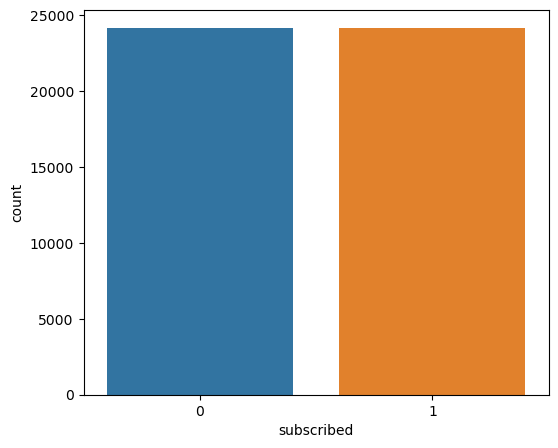

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(x=dfy)

In [27]:
dfy.shape

(48334,)

In [28]:
dfx.shape

(48334, 14)

### the problem of class imbalance is resolve now

In [29]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()

In [30]:
dfx=pd.DataFrame(scal.fit_transform(dfx),columns=dfx.columns)

In [31]:
dfx.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,previous,poutcome
count,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04,4.833400e+04
mean,1.225449e-15,8.938014e-17,-9.408436e-17,9.055620e-17,-7.526749e-17,6.585905e-17,-1.129012e-16,-5.645062e-17,-9.408436e-17,2.116898e-17,-1.646476e-17,4.704218e-16,-2.822531e-17,1.693518e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.781067e+00,-1.361974e+00,-1.835889e+00,-1.740259e+00,-1.079737e-01,-4.101053e+00,-7.779080e-01,-3.317064e-01,-5.496145e-01,-1.682096e+00,-1.670284e+00,-4.053321e+00,-5.185916e-01,-2.935627e+00
25%,-7.943625e-01,-1.053499e+00,-1.890948e-01,-3.105810e-01,-1.079737e-01,-4.893619e-01,-7.779080e-01,-3.317064e-01,-5.496145e-01,-8.647127e-01,-7.233608e-01,-7.071831e-01,-5.185916e-01,-6.443713e-01
50%,-1.079448e-01,-1.280710e-01,-1.890948e-01,-3.105810e-01,-1.079737e-01,4.343572e-02,-7.779080e-01,-3.317064e-01,-5.496145e-01,-4.732946e-02,2.235622e-01,-4.852466e-02,-5.185916e-01,5.012567e-01
75%,7.619244e-01,7.973565e-01,-1.890948e-01,1.119097e+00,-1.079737e-01,6.619789e-01,1.285499e+00,-3.317064e-01,-5.496145e-01,7.700537e-01,8.548441e-01,7.428775e-01,-5.096987e-01,5.012567e-01
max,2.385257e+00,2.031260e+00,1.457700e+00,2.548776e+00,9.261511e+00,2.229343e+00,1.285499e+00,3.014714e+00,1.968998e+00,1.820975e+00,1.801767e+00,2.096116e+00,3.065089e+00,5.012567e-01


### lets import all the libreries for models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### first lets get a best rendom stete value

In [33]:
MAXXACU=0
MAXRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MAXXACU:
        MAXXACU=acc
        MAXRS=i
print('MAX accuracy is',MAXXACU,'BEST rendom state is',MAXRS)    

MAX accuracy is 0.9127646369215916 BEST rendom state is 162


In [34]:
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.30,random_state=MAXRS)

### we will use this value to build models

In [37]:
def evaluation(model, prediction, x_train, y_train, x_test, y_test):
    print(accuracy_score(y_test,prediction))
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))   # defing the all evaluation method to one

### making all modal as a singal modal¶

In [39]:
models = {
    'LogisticRegression'         : LogisticRegression(),
    'DecisionTreeClassifier'     : DecisionTreeClassifier(),
    'RandomForestClassifier'     : RandomForestClassifier(),
    'SVC'                        : SVC(),
    'KNeighborsClassifier'       : KNeighborsClassifier(),
    'GaussianNB'                 : GaussianNB(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'MLPClassifier'              :MLPClassifier()
}

### now lets train all modal at once,

In [40]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    prediction1 = model.predict(x_test)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, x_train, y_train, x_test, y_test), 
          '\n')

Model: LogisticRegression
0.8473898351837804
[[5970 1211]
 [1002 6318]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      7181
           1       0.84      0.86      0.85      7320

    accuracy                           0.85     14501
   macro avg       0.85      0.85      0.85     14501
weighted avg       0.85      0.85      0.85     14501

None 

Model: DecisionTreeClassifier
0.9090407558099441
[[6455  726]
 [ 593 6727]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7181
           1       0.90      0.92      0.91      7320

    accuracy                           0.91     14501
   macro avg       0.91      0.91      0.91     14501
weighted avg       0.91      0.91      0.91     14501

None 

Model: RandomForestClassifier
0.9417281566788497
[[6630  551]
 [ 294 7026]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7181

## ALL MODEL SCORE:
## 'LogisticRegression'         :0.8472519136611268
##    'DecisionTreeClassifier'     :0.9084890697193297
##   'RandomForestClassifier'     : 0.9417281566788497
##    'SVC'                        :0.8854561754361768
##    'KNeighborsClassifier'       : 0.9039376594717605
##    'GaussianNB'                 : 0.7711881939176608
##    'GradientBoostingClassifier' : 0.8899386249224192
##   'MLPClassifier'              :0.8922832908075305

## lets cross validate all models with cross_val_score method¶

In [41]:
for model_name, model in models.items():
    score=cross_val_score(model,dfx,dfy,cv=5,)
    print('Model: {}'.format(model_name))
    print(score)
    print(model.score(x_test, y_test))
    print(score.mean())
    print("                                                                                  ")
    print('deffrence between accuracy_score and cross val_score',(model.score(x_test, y_test)) -(score.mean()))
    print("                                                                                  ")


Model: LogisticRegression
[0.80469639 0.85507396 0.85217751 0.86252198 0.85340368]
0.8473898351837804
0.845574705776001
                                                                                  
deffrence between accuracy_score and cross val_score 0.0018151294077793922
                                                                                  
Model: DecisionTreeClassifier
[0.84328127 0.90886521 0.92003724 0.91910624 0.92106352]
0.9090407558099441
0.9024706954281912
                                                                                  
deffrence between accuracy_score and cross val_score 0.006570060381752896
                                                                                  
Model: RandomForestClassifier
[0.89283128 0.94745009 0.95272577 0.95458777 0.94889303]
0.9417281566788497
0.939297587525129
                                                                                  
deffrence between accuracy_score and cross val_score 0.002430569153

### RandomForestClassifier is our best model

## now lets chek the score on test data that is provided in problem.

In [42]:
TEST=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [43]:
TEST.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [46]:
test=TEST

In [47]:
test.set_index('ID', inplace=True)  # set the id column as index

In [48]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


In [49]:
test=test.drop(['campaign','pdays'],axis=1)  # doping columns wich i have droped in test data set.

In [50]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,previous,poutcome
ID,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,0,unknown


### now lets encode the all object data type columns 

In [51]:
test['job']=label_encoder.fit_transform(test['job'])
test['marital']=label_encoder.fit_transform(test['marital'])
test['education']=label_encoder.fit_transform(test['education'])
test['default']=label_encoder.fit_transform(test['default'])
test['housing']=label_encoder.fit_transform(test['housing'])
test['loan']=label_encoder.fit_transform(test['loan'])
test['contact']=label_encoder.fit_transform(test['contact'])
test['month']=label_encoder.fit_transform(test['month'])
test['poutcome']=label_encoder.fit_transform(test['poutcome'])

In [52]:
test.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,previous,poutcome
ID,,,,,,,,,,,,,,
38441,32,7,1,1,0,118,1,0,0,15,8,20,0,3
40403,78,5,0,0,0,2787,0,0,1,1,5,372,0,3
3709,31,6,2,2,0,144,1,0,2,16,8,676,0,3
37422,57,7,2,0,0,3777,1,0,1,13,8,65,0,3
12527,45,1,0,1,0,-705,0,1,2,3,5,111,0,3
16013,32,4,2,2,0,0,1,0,0,22,5,455,0,3
196,33,1,2,1,0,307,1,0,2,5,8,309,0,3
8516,37,4,1,1,0,341,0,0,2,3,6,120,0,3
31208,36,9,0,2,0,1381,0,0,0,2,7,149,0,3


## now lets pridect test data with  RandomForestClassifier 

In [53]:
rendomf= RandomForestClassifier()

In [57]:
rendomf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
pred = rendomf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred)) 

0.9413833528722158
[[6623  558]
 [ 292 7028]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7181
           1       0.93      0.96      0.94      7320

    accuracy                           0.94     14501
   macro avg       0.94      0.94      0.94     14501
weighted avg       0.94      0.94      0.94     14501



In [60]:
predict=rendomf.predict(test)     ### saving prediction to a variable.

In [61]:
predict

array([1, 0, 0, ..., 1, 1, 1])

In [66]:
test['deposit']=predict   # add the result in data frame

In [68]:
test['deposit'].replace(0,'no',inplace=True)
test['deposit'].replace(1,'yes',inplace=True)

In [69]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,previous,poutcome,deposit
ID,,,,,,,,,,,,,,,
38441,32,7,1,1,0,118,1,0,0,15,8,20,0,3,yes
40403,78,5,0,0,0,2787,0,0,1,1,5,372,0,3,no
3709,31,6,2,2,0,144,1,0,2,16,8,676,0,3,no
37422,57,7,2,0,0,3777,1,0,1,13,8,65,0,3,no
12527,45,1,0,1,0,-705,0,1,2,3,5,111,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4,1,2,0,45,0,0,0,28,1,148,0,3,yes
11743,54,1,1,0,0,2281,1,0,2,20,6,158,0,3,yes
28292,35,5,1,0,0,285,1,0,0,29,4,136,0,3,yes


In [70]:
test.to_csv('BANK MARKETING prediction.csv', header=True, index=False)

### saving the final result to CSV file.

In [71]:
import joblib

In [72]:
joblib.dump(rendomf,"BANK MARKETING project")

['BANK MARKETING project']